# **`Chapter 1: Special Continuous Random Variables`**

**Table of Content:**

- [Import Libraries](#Import_Libraries)
- [1.1. Normal (Gaussian) Distribution](#Normal_Distribution)
- [1.2. Chi-square Distribution](#Chi-square_Distribution)
- [1.3. T-student Distribution](#T-student_Distribution)
- [1.4. Fisher Distribution](#Fisher_Distribution)
- [1.5. Continuous Uniform Distribution](#Continuous_Uniform_Distribution)
- [1.6. Exponential Distribution](#Exponential_Distribution)
- [1.7. Gamma Distribution](#Gamma_Distribution)
- [1.8. Beta Distribution](#Beta_Distribution)
- [1.9. Weibull Distribution](#Weibull_Distribution)
- [1.10. Cauchy Distribution](#Cauchy_Distribution)
- [1.11. Laplace Distribution](#Laplace_Distribution)



<a name='Import_Libraries'></a>

## **Import Libraries**

In [1]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import nbinom
from scipy.stats import geom
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import randint
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import weibull_min
from scipy.stats import cauchy
from scipy.stats import laplace
from scipy.stats import hypergeom
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.stats.weightstats import ztest
from scipy.integrate import quad
from IPython.display import display, Latex

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

<a name='Normal_Distribution'></a>

## **1.1. Normal (Gaussian) Distribution:**

$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\ \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\ \right)\ \quad  x  \in  (- \infty, \infty)$

$f(x) = probability\ density\ function$

$\sigma = standard\ deviation$

$\mu = mean$

$\\ $

A normal distribution with $\sigma = 1$ and $\mu = 0$ is called standard normal distribution.

$\\ $

Moment-generating function:

$M_X (t) = e^{tu\ +\ \frac{1}{2} \sigma^2 t^2} $

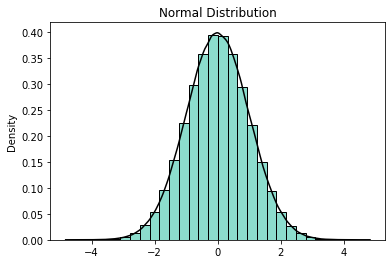

In [ ]:
np.random.seed(1)
N = 1000000
normal_data = np.random.normal(0, 1, N)

sns.histplot(normal_data, color='#1ABC9C', alpha=0.5, stat='density', bins=30)
sns.kdeplot(normal_data, color='black')
plt.title('Normal Distribution');

In [ ]:
loc = 0
scale = 1
print(f'The mean of the Normal({loc},{scale}) Distribution is: ', np.round(norm.mean(loc=loc, scale=scale), 4))
print(f'The median of the Normal({loc},{scale}) Distribution is: ', np.round(norm.median(loc=loc, scale=scale), 4))
print(f'The variance of the Normal({loc},{scale}) Distribution is: ', np.round(norm.var(loc=loc, scale=scale), 4))
print(f'The standard deviation of the Normal({loc},{scale}) Distribution is: ', np.round(norm.std(loc=loc, scale=scale), 4))
print(f'The skewness of the Normal({loc},{scale}) Distribution is: ', np.round(norm.stats(loc=loc, scale=scale, moments='mvsk')[2], 4))
print(f'The kurtosis of the Normal({loc},{scale}) Distribution is: ', np.round(norm.stats(loc=loc, scale=scale, moments='mvsk')[3], 4))

The mean of the Normal(0,1) Distribution is:  0.0
The median of the Normal(0,1) Distribution is:  0.0
The variance of the Normal(0,1) Distribution is:  1.0
The standard deviation of the Normal(0,1) Distribution is:  1.0
The skewness of the Normal(0,1) Distribution is:  0.0
The kurtosis of the Normal(0,1) Distribution is:  0.0


In [ ]:
#Fit a normal distribution to the data and get the mean and std of the data
mu, std = norm.fit(normal_data)

print('mean, std = ', np.round(mu, 2),',', np.round(std, 2))

mean, std =  0.0 , 1.0


$Z_{\alpha}$ is a point in the standard normal distribution that has a right probability of $\alpha$

$P(Z>Z_{\alpha}) = \alpha$

$P(Z<Z_{\alpha}) = 1-\alpha$

Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution. The values in the Z-table are calculated using the cumulative distribution function of a standard normal distribution with a mean of zero and a standard deviation of one. This can be denoted with the equation below:

$ \int_{-\infty}^z \frac{1}{\sqrt{2\pi}}\ \exp(\frac{-z^{2}}{2})\ dz$

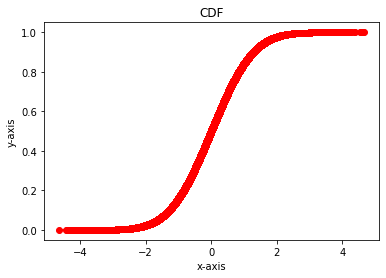

In [ ]:
x = np.sort(normal_data)
#Get the cdf values of y
y = np.arange(N) / float(N)
  
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');

Below is the left-tail standard Normal z-table.

In [ ]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0))

standard_normal_table = pd.DataFrame(data = [], index = np.round(np.arange(0, 3.5, .1),2), columns = np.round(np.arange(0.00, .1, .01), 2))

for index in standard_normal_table.index:
    for column in standard_normal_table.columns:
        z = np.round(index + column, 2)
        value, _ = quad(normalProbabilityDensity, np.NINF, z)
        standard_normal_table.loc[index, column] = value

#Formatting to make the table look like a z-table 
standard_normal_table.index = standard_normal_table.index.astype(str)
standard_normal_table.columns = [str(column).ljust(4,'0') for column in standard_normal_table.columns]
standard_normal_table.index = standard_normal_table.index.astype(str)
standard_normal_table

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.5,0.503989,0.507978,0.511966,0.515953,0.519939,0.523922,0.527903,0.531881,0.535856
0.1,0.539828,0.543795,0.547758,0.551717,0.55567,0.559618,0.563559,0.567495,0.571424,0.575345
0.2,0.57926,0.583166,0.587064,0.590954,0.594835,0.598706,0.602568,0.60642,0.610261,0.614092
0.3,0.617911,0.62172,0.625516,0.6293,0.633072,0.636831,0.640576,0.644309,0.648027,0.651732
0.4,0.655422,0.659097,0.662757,0.666402,0.670031,0.673645,0.677242,0.680822,0.684386,0.687933
0.5,0.691462,0.694974,0.698468,0.701944,0.705401,0.70884,0.71226,0.715661,0.719043,0.722405
0.6,0.725747,0.729069,0.732371,0.735653,0.738914,0.742154,0.745373,0.748571,0.751748,0.754903
0.7,0.758036,0.761148,0.764238,0.767305,0.77035,0.773373,0.776373,0.77935,0.782305,0.785236
0.8,0.788145,0.79103,0.793892,0.796731,0.799546,0.802337,0.805105,0.80785,0.81057,0.813267
0.9,0.81594,0.818589,0.821214,0.823814,0.826391,0.828944,0.831472,0.833977,0.836457,0.838913


To find a point that has a left probability of $\alpha$ use the code below:

''
norm.ppf($\alpha$)
''

If you want to find a point that has a right probability of $\alpha$ use the code below:

''
-norm.ppf($\alpha$)
''

This is because the normal distribution is symmetrical so $Z_{1-\alpha} = -Z_{\alpha}$

In [ ]:
X = 0.95
print(f'The point in the Normal Standard Distribution that has a left probabilty of *{X}*: ', norm.ppf(X))
print(f'The point in the Normal Standard Distribution that has a right probabilty of *{X}*: ', -norm.ppf(X))

The point in the Normal Standard Distribution that has a left probabilty of *0.95*:  1.6448536269514722
The point in the Normal Standard Distribution that has a right probabilty of *0.95*:  -1.6448536269514722


To find the left probabilty of a point  use the code below:

''
norm.cdf($X$)
''

To find the right probabilty of a point  use the code below:

''
norm.sf($X$)
''

In [ ]:
X = 1
print(f'The left probabilty of *{X}* in the Normal Standard Distribution is: ', norm.cdf(X))
print(f'The Right probabilty of *{X}* in the Normal Standard Distribution is: ', norm.sf(X))

The left probabilty of *1* in the Normal Standard Distribution is:  0.8413447460685429
The Right probabilty of *1* in the Normal Standard Distribution is:  0.15865525393145707


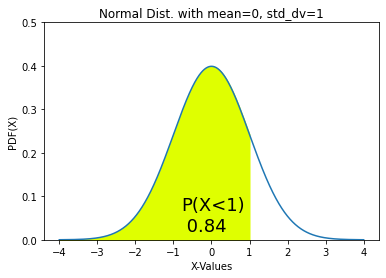

In [ ]:
fig, ax = plt.subplots()
 
#Distribution curve
x= np.arange(-4, 4, 0.001)
ax.plot(x, norm.pdf(x, loc=0, scale=1))
ax.set_title("Normal Dist. with mean=0, std_dv=1")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(-4,1, 0.001)
ax.set_ylim(0, 0.5)
ax.fill_between(px, norm.pdf(px, loc=0, scale=1), color='#DFFF00')

prob = norm.cdf(X)
ax.text(-0.8, 0.02, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

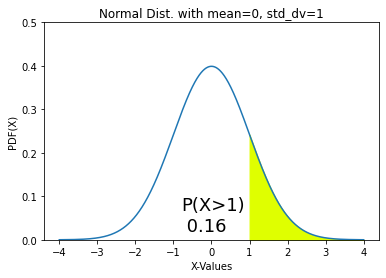

In [ ]:
fig, ax = plt.subplots()
 
#Distribution curve
x= np.arange(-4, 4, 0.001)
ax.plot(x, norm.pdf(x, loc=0, scale=1))
ax.set_title("Normal Dist. with mean=0, std_dv=1")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(1,4, 0.001)
ax.set_ylim(0, 0.5)
ax.fill_between(px, norm.pdf(px, loc=0, scale=1), color='#DFFF00')

prob = norm.sf(X)
ax.text(-0.8, 0.02, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probabilty between two points  use the code below:

''
norm.cdf($X$) - norm.cdf($Y$)
''

In [ ]:
X = -1
Y = 1
print(f'The probabilty between *({X}, {Y})* in the Normal Standard Distribution is: ', norm.cdf(Y) - norm.cdf(X))

The probabilty between *(-1, 1)* in the Normal Standard Distribution is:  0.6826894921370859


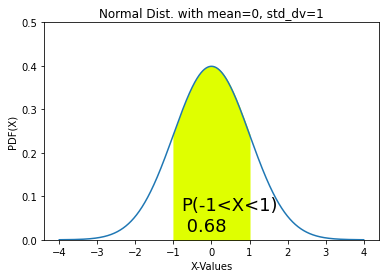

In [ ]:
fig, ax = plt.subplots()
 
#Distribution curve
x= np.arange(-4, 4, 0.001)
ax.plot(x, norm.pdf(x, loc=0, scale=1))
ax.set_title("Normal Dist. with mean=0, std_dv=1")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(-1,1, 0.001)
ax.set_ylim(0, 0.5)
ax.fill_between(px, norm.pdf(px, loc=0, scale=1), color='#DFFF00')

prob = norm.cdf(Y) - norm.cdf(X)
ax.text(-0.8, 0.02, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

If the probability distribution isn't standard normal distribution, you can just pass `loc`=mean and `scale`=std.


In [ ]:
norm.cdf(X, loc=2, scale=3)

0.15865525393145707

Also note that in general the approximate probabilties are shown in the below picture.

<p align="center"> 
  <img width="650" height="350" src="https://miro.medium.com/max/1400/1*IZ2II2HYKeoMrdLU5jW6Dw.png"> 
</p>

<a name='Chi-square_Distribution'></a>

## **1.2. Chi-square Distribution:**


$f_{{\chi}^2_n}(x) = \frac{1}{2^{\frac{n}{2}}\Gamma(\frac{n}{2})} x^{\frac{n-2}{2}} \exp(-\frac{x}{2}) \quad  x  \in  (0, \infty)$

$f(x) = probability\ density\ function$

$n	=	degree\ of\ freedom$

$\Gamma(\frac{n}{2}) = gamma\ function$

$\\ $

where  $Γ(\frac{n}{2})$  is a function given by the following integral:
$Γ(\frac{n}{2})= \int_0^{\infty}\ t^{(\frac{n}{2}−1)} e^{−t}\ dt$

$\\ $

$E({\chi}^2_n) =  \frac{\alpha}{\lambda} = \frac{\frac{n}{2}}{\frac{1}{2}} = n $

$Var({\chi}^2_n) = \frac{\alpha}{\lambda^2} = \frac{\frac{n}{2}}{\frac{1}{2}^2} = 2n$

Moment-generating function:

$M_{{\chi}^2_n}(t) = (\frac{\lambda}{\lambda -t})^{\alpha} = (\frac{0.5}{0.5 -t})^{\frac{n}{2}} =  (\sqrt{1-2t})^{-n} $

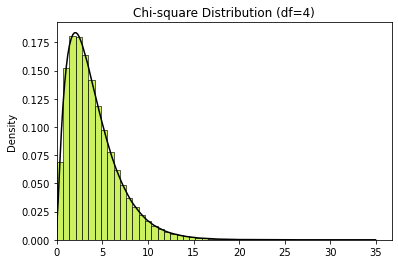

In [ ]:
np.random.seed(1)
N = 5000000
df = 4
chi_data = np.random.chisquare(df = df, size = N)

sns.histplot(chi_data, color='#B5EA1C', alpha=0.7, stat='density', bins=50)
sns.kdeplot(chi_data, color='black')
plt.xlim(left=0)
plt.title(f'Chi-square Distribution (df={df})');

In [ ]:
df = 4
print(f'The mean of the Chi2(n={df}) Distribution is: ', np.round(chi2.mean(df), 4))
print(f'The median of the Chi2(n={df}) Distribution is: ', np.round(chi2.median(df), 4))
print(f'The variance of the Chi2(n={df}) Distribution is: ', np.round(chi2.var(df), 4))
print(f'The standard deviation of the Chi2(n={df}) Distribution is: ', np.round(chi2.std(df), 4))
print(f'The skewness of the Chi2(n={df}) Distribution is: ', np.round(chi2.stats(df, moments='mvsk')[2], 4))
print(f'The kurtosis of the Chi2(n={df}) Distribution is: ', np.round(chi2.stats(df, moments='mvsk')[3], 4))

The mean of the Chi2(n=4) Distribution is:  4.0
The median of the Chi2(n=4) Distribution is:  3.3567
The variance of the Chi2(n=4) Distribution is:  8.0
The standard deviation of the Chi2(n=4) Distribution is:  2.8284
The skewness of the Chi2(n=4) Distribution is:  1.4142
The kurtosis of the Chi2(n=4) Distribution is:  3.0


In [ ]:
#Fit a chi2 distribution to the data and get the parameters
params = chi2.fit(chi_data)
params
print('df = ', params[0], ',', 'loc = ', params[1], ',', 'scale = ',params[2])

df =  3.4648293540666764 , loc =  0.0007532493860343597 , scale =  1.0065692099045913


The key characteristics of the chi-square distribution depend directly on the degree of freedom. The chi-square distribution curve is skewed to the right, and its shape depends on the degrees of freedom. For $df > 90$, the curve approximates the normal distribution.

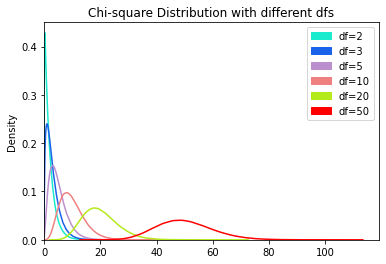

In [ ]:
np.random.seed(1)
N = 1000000
df1, df2, df3, df4, df5, df6 = [2, 3, 5, 10, 20, 50]

chi_data1 = np.random.chisquare(df = df1, size = N)
chi_data2 = np.random.chisquare(df = df2, size = N)
chi_data3 = np.random.chisquare(df = df3, size = N)
chi_data4 = np.random.chisquare(df = df4, size = N)
chi_data5 = np.random.chisquare(df = df5, size = N)
chi_data6 = np.random.chisquare(df = df6, size = N)

sns.kdeplot(chi_data1, color='#1AEACD')
sns.kdeplot(chi_data2, color='#1A62EA')
sns.kdeplot(chi_data3, color='#BB8FCE')
sns.kdeplot(chi_data4, color='LightCoral')
sns.kdeplot(chi_data5, color='#B4EA1A')
sns.kdeplot(chi_data6, color='r')

patch1 = mpatches.Patch(color='#1AEACD', label=f'df={df1}')
patch2 = mpatches.Patch(color='#1A62EA', label=f'df={df2}')
patch3 = mpatches.Patch(color='#BB8FCE', label=f'df={df3}')
patch4 = mpatches.Patch(color='LightCoral', label=f'df={df4}')
patch5 = mpatches.Patch(color='#B4EA1A', label=f'df={df5}')
patch6 = mpatches.Patch(color='r', label=f'df={df6}')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], frameon=True);
plt.xlim(left=0)
plt.title('Chi-square Distribution with different dfs');

If $Z_{1}^{2}, Z_{2}^{2}, ..., Z_{n}^{2}∼N(0,1)$ and are independent, then $\quad Y = \sum_{i=1}^n Z_i^2 \sim {\chi}^2_n \sim \Gamma(\alpha= \frac{n}{2},  \lambda= \frac{1}{2})$

If $n=2$, the chi-square distribution changes to the exponential function.

If $n$ is even, the chi-square distribution changes to the erlang function.

$\\ $

If $X_{1}, X_{2}, ..., X_{m}$ have chi-square distributions with degree of freedoms $n_{1}, n_{2}, ..., n_{m}$ and are independent then $Y = \sum_{i=1}^m X_i \sim {\chi}^2_{\sum_{i=1}^m {n_i}}$

${\chi}^2_n$ is a point in the chi-square distribution that has a right probability of $\alpha$

$P({\chi}^2_n>{\chi}^2_{{\alpha} ,n}) = \alpha$

$P({\chi}^2_n<{\chi}^2_{{\alpha} ,n}) = 1-\alpha$

Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

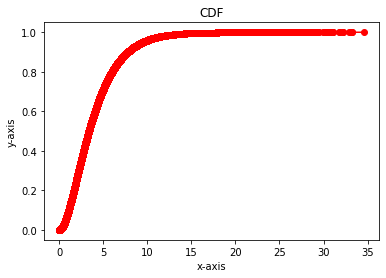

In [ ]:
x = np.sort(chi_data)
N = 5000000
#Get the cdf values of y
y = np.arange(N) / float(N)
  
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');

Below is the chi-square distribution table.

In [ ]:
df = np.array(list(range(1, 30)) + list(range(30, 101, 10)))
p = np.array([0.995, 0.99, 0.975, 0.95, 0.90, 0.50, 0.10, 0.05, 0.025, 0.01, 0.005])
chi2_table = pd.DataFrame(data = [], index = df, columns = p)

for index in chi2_table.index:
    for column in chi2_table.columns:
        chi2_table.loc[index, column] = chi2.isf(column, index)

np.set_printoptions(linewidth=130, formatter=dict(float=lambda x: "%7.3f" % x))
chi2_table

,0.995,0.990,0.975,0.950,0.900,0.500,0.100,0.050,0.025,0.010,0.005
1,0.000039,0.000157,0.000982,0.003932,0.015791,0.454936,2.705543,3.841459,5.023886,6.634897,7.879439
2,0.010025,0.020101,0.050636,0.102587,0.210721,1.386294,4.60517,5.991465,7.377759,9.21034,10.596635
3,0.071722,0.114832,0.215795,0.351846,0.584374,2.365974,6.251389,7.814728,9.348404,11.344867,12.838156
4,0.206989,0.297109,0.484419,0.710723,1.063623,3.356694,7.77944,9.487729,11.143287,13.276704,14.860259
5,0.411742,0.554298,0.831212,1.145476,1.610308,4.35146,9.236357,11.070498,12.832502,15.086272,16.749602
6,0.675727,0.87209,1.237344,1.635383,2.204131,5.348121,10.644641,12.591587,14.449375,16.811894,18.547584
7,0.989256,1.239042,1.689869,2.16735,2.833107,6.345811,12.017037,14.06714,16.012764,18.475307,20.27774
8,1.344413,1.646497,2.179731,2.732637,3.489539,7.344121,13.361566,15.507313,17.534546,20.090235,21.954955
9,1.734933,2.087901,2.700389,3.325113,4.168159,8.342833,14.683657,16.918978,19.022768,21.665994,23.589351
10,2.155856,2.558212,3.246973,3.940299,4.865182,9.341818,15.987179,18.307038,20.483177,23.209251,25.18818


To find a point that has a right probability of $p$ use the code below:

''
chi2.isf(p, df)
''

To find a point that has a left probability of $p$ use the code below:

''
chi2.isf(1-p, df)
''


In [ ]:
p = 0.95
df = 2
print(f'The point in the Chi2(n={df}) Distribution that has a right probabilty of *{p}*: ', chi2.isf(p, df))
print(f'The point in the Chi2(n={df}) Distribution that has a left probabilty of *{p}*: ', chi2.isf(1-p, df))

The point in the Chi2(n=2) Distribution that has a right probabilty of *0.95*:  0.10258658877510116
The point in the Chi2(n=2) Distribution that has a left probabilty of *0.95*:  5.991464547107979


To find the left probabilty of a point  use the code below:

''
chi2.cdf(X,df)
''

To find the right probabilty of a point  use the code below:

''
chi2.sf(X,df)
''

In [ ]:
X = 4.60517
df = 2
print(f'The left probabilty of *{X}* in the Chi2(n={df}) Distribution is: ', chi2.cdf(X,df))
print(f'The Right probabilty of *{X}* in the Chi2(n={df}) Distribution is: ', chi2.sf(X,df))

The left probabilty of *4.60517* in the Chi2(n=2) Distribution is:  0.899999990700595
The Right probabilty of *4.60517* in the Chi2(n=2) Distribution is:  0.10000000929940497


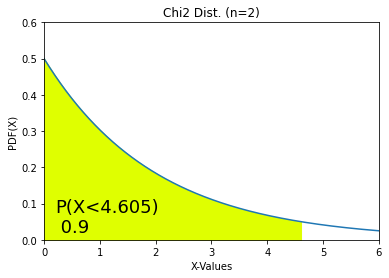

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 6, 0.001)
ax.plot(x, chi2.pdf(x, df))
ax.set_title(f'Chi2 Dist. (n={df})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(0, X, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 6)
ax.fill_between(px, chi2.pdf(px, df), color='#DFFF00')

prob = chi2.cdf(X, df)
ax.text(0.2, 0.02, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

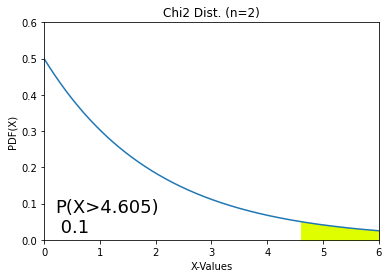

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 6, 0.001)
ax.plot(x, chi2.pdf(x, df))
ax.set_title(f'Chi2 Dist. (n={df})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, 7, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 6)
ax.fill_between(px, chi2.pdf(px, df), color='#DFFF00')

prob = chi2.sf(X, df)
ax.text(0.2, 0.02, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probabilty between two points  use the code below:

''
norm.cdf(X) - norm.cdf(Y)
''

In [ ]:
X = 1
Y = 3
df = 2
print(f'The probabilty between *({X}, {Y})* in the Chi2(n={df}) Distribution is: ', chi2.cdf(Y,df) - chi2.cdf(X,df))

The probabilty between *(1, 3)* in the Chi2(n=2) Distribution is:  0.3834004995642037


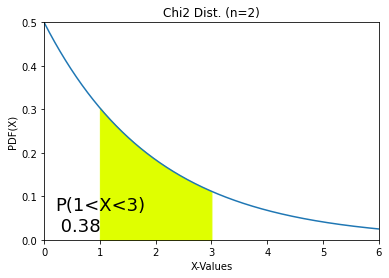

In [ ]:
fig, ax = plt.subplots()
 
#Distribution curve
x = np.arange(0, 6, 0.001)
ax.plot(x, chi2.pdf(x, df))
ax.set_title(f'Chi2 Dist. (n={df})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 0.5)
ax.set_xlim(0, 6)
ax.fill_between(px, chi2.pdf(px, df), color='#DFFF00')

prob = chi2.cdf(Y,df) - chi2.cdf(X,df)
ax.text(0.2, 0.02, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

If $X \sim Exp(\lambda) \quad$ then $\quad Y = 2{\lambda}X \sim {\chi}^2_2$

If $X \sim {\chi}^2_n \quad$ then $\quad Y=aX \sim Γ(\lambda = \frac{1}{2a}, \alpha = \frac{n}{2})$

<a name='T-student_Distribution'></a>

## **1.3. T-student Distribution:**

$t_{n} = \frac{Z}{\sqrt{\frac{Y}{n}}}$

$Z \sim N(0,1)$

$Y \sim {\chi}^2_n$

$\\ $

$f_{t_n}(x) = \frac {\Gamma(\frac{n+1}{2})}{\sqrt{n\Pi}\ \Gamma(\frac{n}{2})} (1+\frac{X^2}{n})^{-\frac {n+1}{2}}
\quad  x  \in  (-\infty, \infty)$

$f(x) = probability\ density\ function$

$n	=	degree\ of\ freedom$

$\Gamma = gamma\ function$

$\\ $

$E(t_n) = 0 \quad \quad \quad n>1 $

$Var(t_n) = \frac{n}{n-2} \quad n>2$

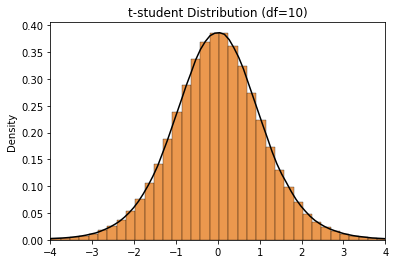

In [ ]:
np.random.seed(1)
N = 1000000
df = 10
t_data = np.random.standard_t(df, N)

sns.histplot(t_data, color='#E67E22', alpha=0.8, stat='density', bins=100)
sns.kdeplot(t_data, color='black')
plt.xlim(-4,4)
plt.title(f't-student Distribution (df={df})');

In [ ]:
df = 10
print(f'The mean of the T-student(n={df}) Distribution is: ', np.round(t.mean(df), 4))
print(f'The median of the T-student(n={df}) Distribution is: ', np.round(t.median(df), 4))
print(f'The variance of the T-student(n={df}) Distribution is: ', np.round(t.var(df), 4))
print(f'The standard deviation of the T-student(n={df}) Distribution is: ', np.round(t.std(df), 4))
print(f'The skewness of the T-student(n={df}) Distribution is: ', np.round(t.stats(df, moments='mvsk')[2], 4))
print(f'The kurtosis of the T-student(n={df}) Distribution is: ', np.round(t.stats(df, moments='mvsk')[3], 4))

The mean of the T-student(n=10) Distribution is:  0.0
The median of the T-student(n=10) Distribution is:  0.0
The variance of the T-student(n=10) Distribution is:  1.25
The standard deviation of the T-student(n=10) Distribution is:  1.118
The skewness of the T-student(n=10) Distribution is:  0.0
The kurtosis of the T-student(n=10) Distribution is:  1.0


In [ ]:
#Fit a t-student distribution to the data and get the parameters
params = t.fit(t_data)

print('df = ', params[0], ',', 'loc = ', params[1], ',', 'scale = ',params[2])

df =  9.978249014529133 , loc =  -0.00015591212212838414 , scale =  0.9990011397669643


The t-student distribution curve depends on the degree of freedom. If $df$ is high, the curve approximates the normal distribution.

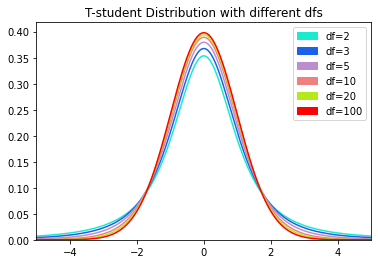

In [ ]:
np.random.seed(1)
N = 100000
x = np.linspace(-5, 5, N)
df1, df2, df3, df4, df5, df6 = [2, 3, 5, 10, 20, 100]

t_data1 = t.pdf(x, df1)
t_data2 = t.pdf(x, df2)
t_data3 = t.pdf(x, df3)
t_data4 = t.pdf(x, df4)
t_data5 = t.pdf(x, df5)
t_data6 = t.pdf(x, df6)

plt.plot(x, t_data1, color='#1AEACD')
plt.plot(x, t_data2, color='#1A62EA')
plt.plot(x, t_data3, color='#BB8FCE')
plt.plot(x, t_data4, color='LightCoral')
plt.plot(x, t_data5, color='#B4EA1A')
plt.plot(x, t_data6, color='r')

patch1 = mpatches.Patch(color='#1AEACD', label=f'df={df1}')
patch2 = mpatches.Patch(color='#1A62EA', label=f'df={df2}')
patch3 = mpatches.Patch(color='#BB8FCE', label=f'df={df3}')
patch4 = mpatches.Patch(color='LightCoral', label=f'df={df4}')
patch5 = mpatches.Patch(color='#B4EA1A', label=f'df={df5}')
patch6 = mpatches.Patch(color='r', label=f'df={df6}')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], frameon=True);
plt.xlim(-5, 5)
plt.ylim(bottom=0)
plt.title('T-student Distribution with different dfs');

$t_{\alpha,n}$ is a point in the t-student distribution that has a right probability of $\alpha$.

$P(t_n>t_{\alpha,n}) = \alpha$

$P(t_n<t_{\alpha,n}) = 1-\alpha$

$t_{1-\alpha,n} = -t_{\alpha,n}$

Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

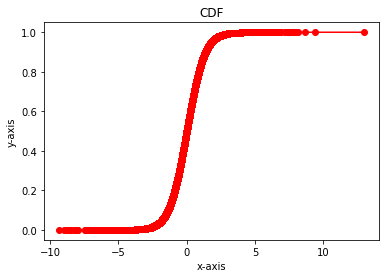

In [ ]:
x = np.sort(t_data)
N = 1000000
#Get the cdf values of y
y = np.arange(N) / float(N)
  
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');

Below is the t-student distribution table.

In [ ]:
df = np.array(list(range(1, 30)) + list(range(30, 101, 10)))
p = np.array([0.4, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001, 0.0005])
t_table = pd.DataFrame(data = [], index = df, columns = p)

for index in t_table.index:
    for column in t_table.columns:
        t_table.loc[index, column] = t.isf(column, index)

np.set_printoptions(linewidth=130, formatter=dict(float=lambda x: "%7.3f" % x))
t_table

,0.4000,0.2500,0.1000,0.0500,0.0250,0.0100,0.0050,0.0025,0.0010,0.0005
1,0.32492,1.0,3.077684,6.313752,12.706205,31.820516,63.656741,127.321336,318.308839,636.619249
2,0.288675,0.816497,1.885618,2.919986,4.302653,6.964557,9.924843,14.089047,22.327125,31.599055
3,0.276671,0.764892,1.637744,2.353363,3.182446,4.540703,5.840909,7.453319,10.214532,12.923979
4,0.270722,0.740697,1.533206,2.131847,2.776445,3.746947,4.604095,5.597568,7.173182,8.610302
5,0.267181,0.726687,1.475884,2.015048,2.570582,3.36493,4.032143,4.773341,5.89343,6.868827
6,0.264835,0.717558,1.439756,1.94318,2.446912,3.142668,3.707428,4.316827,5.207626,5.958816
7,0.263167,0.711142,1.414924,1.894579,2.364624,2.997952,3.499483,4.029337,4.78529,5.407883
8,0.261921,0.706387,1.396815,1.859548,2.306004,2.896459,3.355387,3.832519,4.500791,5.041305
9,0.260955,0.702722,1.383029,1.833113,2.262157,2.821438,3.249836,3.689662,4.296806,4.780913
10,0.260185,0.699812,1.372184,1.812461,2.228139,2.763769,3.169273,3.581406,4.1437,4.586894


To find a point that has a right probability of $p$ use the code below:

''
t.isf(p, df)
''

To find a point that has a left probability of $p$ use the code below:

''
t.isf(1-p, df)
''


In [ ]:
p = 0.95
df = 2
print(f'The point in the T-student(n={df}) Distribution that has a right probabilty of *{p}*: ', t.isf(p, df))
print(f'The point in the T-student(n={df}) Distribution that has a left probabilty of *{p}*: ', t.isf(1-p, df))

The point in the T-student(n=2) Distribution that has a right probabilty of *0.95*:  -2.919985580355516
The point in the T-student(n=2) Distribution that has a left probabilty of *0.95*:  2.919985580355516


To find the left probabilty of a point  use the code below:

''
t.cdf(X,df)
''

To find the right probabilty of a point  use the code below:

''
t.sf(X,df)
''

In [ ]:
X = 0.816497
df = 2
print(f'The left probabilty of *{X}* in the T-student(n={df}) Distribution is: ', t.cdf(X,df))
print(f'The Right probabilty of *{X}* in the T-student(n={df}) Distribution is: ', t.sf(X,df))

The left probabilty of *0.816497* in the T-student(n=2) Distribution is:  0.7500000962355974
The Right probabilty of *0.816497* in the T-student(n=2) Distribution is:  0.24999990376440262


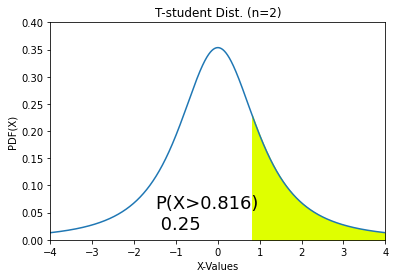

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(-4, 4, 0.001)
ax.plot(x, t.pdf(x, df))
ax.set_title(f'T-student Dist. (n={df})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, 4, 0.001)
ax.set_ylim(0, 0.4)
ax.set_xlim(-4, 4)
ax.fill_between(px, t.pdf(px, df), color='#DFFF00')

prob = t.sf(X, df)
ax.text(-1.5, 0.02, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

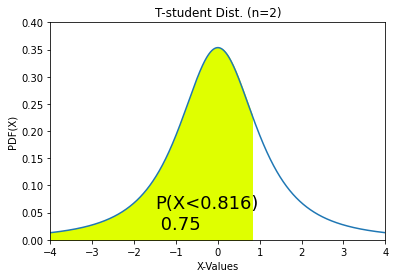

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(-4, 4, 0.001)
ax.plot(x, t.pdf(x, df))
ax.set_title(f'T-student Dist. (n={df})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(-4, X, 0.001)
ax.set_ylim(0, 0.4)

ax.set_xlim(-4, 4)
ax.fill_between(px, t.pdf(px, df), color='#DFFF00')

prob = t.cdf(X, df)
ax.text(-1.5, 0.02, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probabilty between two points  use the code below:

''
t.cdf(X,df) - t.cdf(Y,df)
''

In [ ]:
X = -1
Y = 2
df = 2
print(f'The probabilty between *({X}, {Y})* in the T-student(n={df}) Distribution is: ', t.cdf(Y,df) - t.cdf(X,df))

The probabilty between *(-1, 2)* in the T-student(n=2) Distribution is:  0.6969234250586759


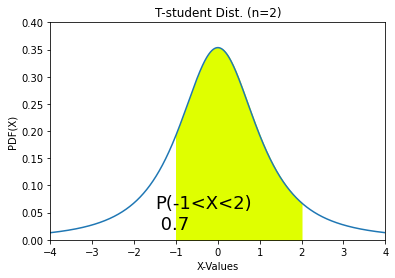

In [ ]:
fig, ax = plt.subplots()
 
#Distribution curve
x= np.arange(-4, 4, 0.001)
ax.plot(x, t.pdf(x, df))
ax.set_title(f'T-student Dist. (n={df})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 0.4)
ax.set_xlim(-4, 4)
ax.fill_between(px, t.pdf(px, df), color='#DFFF00')

prob = t.cdf(Y,df) - t.cdf(X,df)
ax.text(-1.5, 0.02, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

If $n=1$, the T-student distribution changes to the standard Cauchy distribution.

$f_{t_1}(x) = \frac{1}{\pi (1+x^2)}
\quad  x  \in  (-\infty, \infty)$

$\\ $

If $Z_{1}, Z_{2}∼N(0,1)$ and are independent, then $\frac{Z_{1}}{|Z_{2}|}, \frac{|Z_{1}|}{Z_{2}}, \frac{Z_{1}}{Z_{2}} \sim t_1$

$\\ $

If $X \sim t_1 \quad$ then $\quad Y = \frac{1}{X} \sim t_1$

<a name='Fisher_Distribution'></a>

## **1.4. Fisher Distribution:**

$F_{n,m} = \frac{\frac{{\chi}^2_n}{n}}{\frac{{\chi}^2_m}{m}}$

$\\ $

$f_{F_{n,m}}(x) = \frac{\Gamma(\frac{n+m}{2})}{\Gamma (\frac{n}{2}) \ \Gamma (\frac{m}{2})}\ (\frac{n}{m})^{\frac{n}{2}}\ x^{\frac{n}{2}-1}\ (1+\frac{n}{m}x)^{-\frac{n+m}{2}} \quad  x  \in  (0, \infty)$

$f(x) = probability\ density\ function$

$n	=	degrees\ of\ freedom$

$\Gamma = gamma\ function$

$\\ $

$E(F_{n,m}) = \frac{m}{m-2}\ \quad \quad \quad \quad \quad m>2 $

$Var(F_{n,m}) = \frac{2m^2\ (m+n-2)}{n\ (m-2)^2\ (m-4)} \quad m>4$

$Mode(F_{n,m}) = \frac{n-2}{n}  \times \frac{m}{m+2}\ \quad n>2$

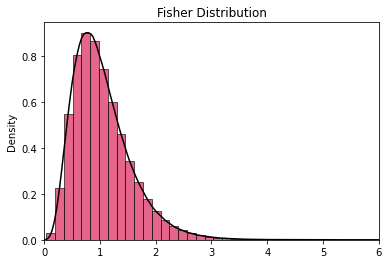

In [ ]:
np.random.seed(1)
N = 1000000
df1 = 10
df2 = 50

f_data = np.random.f(df1, df2, N)

sns.histplot(f_data, color='#DE3163', stat='density', bins=50)
sns.kdeplot(f_data, color='black')
plt.xlim(0,6)
plt.title('Fisher Distribution');

In [ ]:
df1 = 10
df2 = 50
print(f'The mean of the Fisher({df1},{df2}) Distribution is: ', np.round(f.mean(df1, df2), 4))
print(f'The median of the Fisher({df1},{df2}) Distribution is: ', np.round(f.median(df1, df2), 4))
print(f'The variance of the Fisher({df1},{df2}) Distribution is: ', np.round(f.var(df1, df2), 4))
print(f'The standard deviation of the Fisher({df1},{df2}) Distribution is: ', np.round(f.std(df1, df2), 4))
print(f'The skewness of the Fisher({df1},{df2}) Distribution is: ', np.round(f.stats(df1, df2, moments='mvsk')[2], 4))
print(f'The kurtosis of the Fisher({df1},{df2}) Distribution is: ', np.round(f.stats(df1, df2, moments='mvsk')[3], 4))

The mean of the Fisher(10,50) Distribution is:  1.0417
The median of the Fisher(10,50) Distribution is:  0.9468
The variance of the Fisher(10,50) Distribution is:  0.2736
The standard deviation of the Fisher(10,50) Distribution is:  0.5231
The skewness of the Fisher(10,50) Distribution is:  1.231
The kurtosis of the Fisher(10,50) Distribution is:  2.6671


In [ ]:
#Fit a fisher distribution to the data and get the parameters
params = f.fit(f_data)

print('df1 = ', params[0], ',', 'df2 = ',  params[1], ',', 'loc = ', params[2], ',', 'scale = ', params[3])

df1 =  9.92213778335306 , df2 =  50.99787806119921 , loc =  0.0009334078374999939 , scale =  0.9995539961148325


The t-student distribution curve depends on the degrees of freedom. If $df_1$ and $df_2$ are high, the distribution converges to 1.

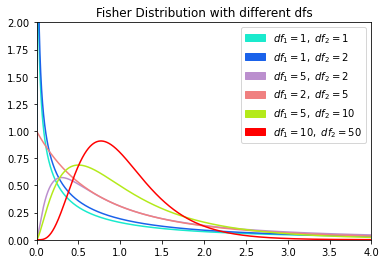

In [ ]:
np.random.seed(1)
N = 100000
x = np.linspace(-5, 5, N)
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12 = [1, 1, 1, 2, 5, 2, 2, 5, 5, 10, 10, 50]

f_data1 = f.pdf(x, df1, df2)
f_data2 = f.pdf(x, df3, df4)
f_data3 = f.pdf(x, df5, df6)
f_data4 = f.pdf(x, df7, df8)
f_data5 = f.pdf(x, df9, df10)
f_data6 = f.pdf(x, df11, df12)

plt.plot(x, f_data1, color='#1AEACD')
plt.plot(x, f_data2, color='#1A62EA')
plt.plot(x, f_data3, color='#BB8FCE')
plt.plot(x, f_data4, color='LightCoral')
plt.plot(x, f_data5, color='#B4EA1A')
plt.plot(x, f_data6, color='r')

patch1 = mpatches.Patch(color='#1AEACD', label=f'$df_1={df1},\ df_2={df2}$')
patch2 = mpatches.Patch(color='#1A62EA', label=f'$df_1={df3},\ df_2={df4}$')
patch3 = mpatches.Patch(color='#BB8FCE', label=f'$df_1={df5},\ df_2={df6}$')
patch4 = mpatches.Patch(color='LightCoral', label=f'$df_1={df7},\ df_2={df8}$')
patch5 = mpatches.Patch(color='#B4EA1A', label=f'$df_1={df9},\ df_2={df10}$')
patch6 = mpatches.Patch(color='r', label=f'$df_1={df11},\ df_2={df12}$')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], frameon=True);
plt.xlim(0, 4)
plt.ylim(0, 2)
plt.title('Fisher Distribution with different dfs');

$F_{\alpha,n,m}$ is a point in the fisher distribution that has a right probability of $\alpha$.

$P(F_{n,m}>F_{\alpha,n,m}) = \alpha$

$P(F_{n,m}<F_{\alpha,n,m}) = 1-\alpha$

$F_{1-\alpha,n,m} = \frac{1}{F_{\alpha,m,n}}$

Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

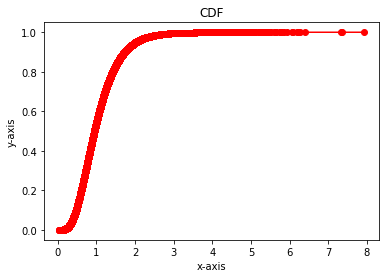

In [ ]:
x = np.sort(f_data)
N = 1000000
#Get the cdf values of y
y = np.arange(N) / float(N)
  
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');

Below is the fisher distribution table.

In [ ]:
df1 = np.array(list(range(1, 30)) + list(range(30, 101, 10)))
df2 = np.array(list(range(1, 30)) + list(range(30, 101, 10)))
p = 0.05
f_table = pd.DataFrame(data = [], index = df1, columns = df2)

np.set_printoptions(linewidth=130, formatter=dict(float=lambda x: "%7.3f" % x))

for index in f_table.index:
  for column in f_table.columns:
    f_table.loc[index, column] = f.isf(p, index, column)

pd.set_option('display.max_columns', None)
f_table

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,40,50,60,70,80,90,100
1,161.447639,18.512821,10.127964,7.708647,6.607891,5.987378,5.591448,5.317655,5.117355,4.964603,4.844336,4.747225,4.667193,4.60011,4.543077,4.493998,4.451322,4.413873,4.38075,4.351244,4.324794,4.30095,4.279344,4.259677,4.241699,4.225201,4.210008,4.195972,4.182964,4.170877,4.084746,4.03431,4.001191,3.977779,3.960352,3.946876,3.936143
2,199.5,19.0,9.552094,6.944272,5.786135,5.143253,4.737414,4.45897,4.256495,4.102821,3.982298,3.885294,3.805565,3.738892,3.68232,3.633723,3.591531,3.554557,3.521893,3.492828,3.4668,3.443357,3.422132,3.402826,3.38519,3.369016,3.354131,3.340386,3.327654,3.31583,3.231727,3.18261,3.150411,3.127676,3.110766,3.097698,3.087296
3,215.707345,19.164292,9.276628,6.591382,5.409451,4.757063,4.346831,4.066181,3.862548,3.708265,3.587434,3.490295,3.410534,3.343889,3.287382,3.238872,3.196777,3.159908,3.12735,3.098391,3.072467,3.049125,3.027998,3.008787,2.991241,2.975154,2.960351,2.946685,2.93403,2.922277,2.838745,2.790008,2.758078,2.735541,2.718785,2.705838,2.695534
4,224.583241,19.246794,9.117182,6.388233,5.192168,4.533677,4.120312,3.837853,3.633089,3.47805,3.35669,3.259167,3.179117,3.11225,3.055568,3.006917,2.964708,2.927744,2.895107,2.866081,2.8401,2.816708,2.795539,2.776289,2.75871,2.742594,2.727765,2.714076,2.701399,2.689628,2.605975,2.557179,2.525215,2.502656,2.485885,2.472927,2.462615
5,230.161878,19.29641,9.013455,6.256057,5.050329,4.387374,3.971523,3.687499,3.481659,3.325835,3.203874,3.105875,3.025438,2.958249,2.901295,2.852409,2.809996,2.772853,2.740058,2.71089,2.684781,2.661274,2.639999,2.620654,2.602987,2.58679,2.571886,2.558128,2.545386,2.533555,2.449466,2.400409,2.36827,2.345586,2.328721,2.315689,2.305318
6,233.986,19.329534,8.940645,6.163132,4.950288,4.283866,3.865969,3.58058,3.373754,3.217175,3.094613,2.99612,2.915269,2.847726,2.790465,2.741311,2.69866,2.661305,2.628318,2.598978,2.572712,2.549061,2.527655,2.508189,2.49041,2.474109,2.459108,2.445259,2.432434,2.420523,2.335852,2.286436,2.254053,2.231192,2.214193,2.201056,2.190601
7,236.7684,19.353218,8.886743,6.094211,4.875872,4.206658,3.787044,3.500464,3.292746,3.135465,3.01233,2.913358,2.832098,2.764199,2.706627,2.657197,2.614299,2.576722,2.543534,2.514011,2.487578,2.463774,2.442226,2.422629,2.404728,2.388314,2.373208,2.35926,2.346342,2.334344,2.249024,2.199202,2.166541,2.143478,2.126324,2.113067,2.102513
8,238.882695,19.370993,8.845238,6.041044,4.81832,4.146804,3.725725,3.438101,3.229583,3.071658,2.94799,2.848565,2.766913,2.698672,2.640797,2.591096,2.547955,2.510158,2.47677,2.447064,2.420462,2.396503,2.374812,2.355081,2.337057,2.320527,2.305313,2.291264,2.278251,2.266163,2.18017,2.129923,2.096968,2.07369,2.056373,2.042986,2.032328
9,240.543255,19.384826,8.8123,5.998779,4.772466,4.099016,3.676675,3.38813,3.178893,3.020383,2.896223,2.796375,2.714356,2.645791,2.587626,2.537667,2.494291,2.456281,2.422699,2.392814,2.366048,2.341937,2.320105,2.300244,2.282097,2.265453,2.250131,2.235982,2.222874,2.210697,2.124029,2.073351,2.040098,2.016601,1.999115,1.985595,1.974829
10,241.881747,19.395897,8.785525,5.964371,4.735063,4.059963,3.636523,3.347163,3.13728,2.978237,2.853625,2.753387,2.671024,2.602155,2.543719,2.493513,2.449916,2.411702,2.377934,2.347878,2.320953,2.296696,2.274728,2.254739,2.236474,2.219718,2.204292,2.190044,2.176844,2.16458,2.077248,2.026143,1.992592,1.968875,1.95122,1.937567,1.926692


To find a point that has a right probability of $p$ use the code below:

''
t.isf(p, df1, df2)
''

To find a point that has a left probability of $p$ use the code below:

''
t.isf(1-p, df1, df2)
''


In [ ]:
p = 0.05
df1 = 3
df2 = 4
print(f'The point in the Fisher(n={df1},{df2}) Distribution that has a right probabilty of *{p}*: ', f.isf(p, df1, df2))
print(f'The point in the Fisher(n={df1},{df2}) Distribution that has a left probabilty of *{p}*: ', f.isf(1-p, df1, df2))

The point in the Fisher(n=3,4) Distribution that has a right probabilty of *0.05*:  6.591382116425578
The point in the Fisher(n=3,4) Distribution that has a left probabilty of *0.05*:  0.10968301084953337


To find the left probabilty of a point  use the code below:

''
f.cdf(X,df1,df2)
''

To find the right probabilty of a point  use the code below:

''
f.sf(X,df1,df2)
''

In [ ]:
X = 4
df1 = 3
df2 = 4
print(f'The left probabilty of *{X}* in the Fisher({df1},{df2}) Distribution is: ', f.cdf(X, df1, df2))
print(f'The Right probabilty of *{X}* in the Fisher({df1},{df2}) Distribution is: ', f.sf(X, df1, df2))

The left probabilty of *4* in the Fisher(3,4) Distribution is:  0.8930886976527024
The Right probabilty of *4* in the Fisher(3,4) Distribution is:  0.10691130234729768


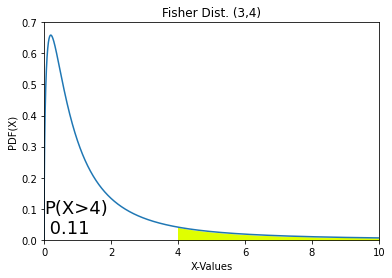

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 10, 0.001)
ax.plot(x, f.pdf(x, df1, df1))
ax.set_title(f'Fisher Dist. ({df1},{df2})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, 10, 0.001)
ax.set_ylim(0, 0.7)
ax.set_xlim(0, 10)
ax.fill_between(px, f.pdf(px, df1, df2), color='#DFFF00')

prob = f.sf(X, df1, df2)
ax.text(0, 0.02, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

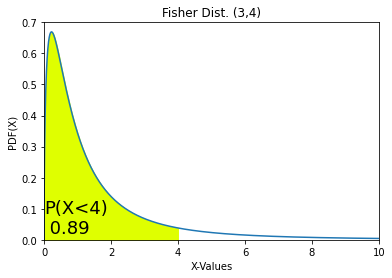

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 10, 0.001)
ax.plot(x, f.pdf(x, df1, df2))
ax.set_title(f'Fisher Dist. ({df1},{df2})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(0, X, 0.001)
ax.set_ylim(0, 0.7)
ax.set_xlim(0, 10)
ax.fill_between(px, f.pdf(px, df1, df2), color='#DFFF00')

prob = f.cdf(X, df1, df2)
ax.text(0, 0.02, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probabilty between two points  use the code below:

''
f.cdf(Y,df1,df) - f.cdf(X,df1,df)
''

In [ ]:
X = 1
Y = 3
df1 = 2
df2 = 3
print(f'The probabilty between *({X}, {Y})* in the Fisher({df1},{df2}) Distribution is: ', f.cdf(Y, df1, df2) - f.cdf(X, df1, df2))

The probabilty between *(1, 3)* in the Fisher(2,3) Distribution is:  0.2723079118150149


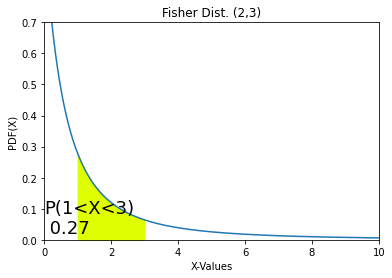

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 10, 0.001)
ax.plot(x, f.pdf(x, df1, df2))
ax.set_title(f'Fisher Dist. ({df1},{df2})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 0.7)
ax.set_xlim(0, 10)
ax.fill_between(px, f.pdf(px, df1, df2), color='#DFFF00')

prob = f.cdf(Y, df1, df2) - f.cdf(X, df1, df2)
ax.text(0, 0.02, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

$f_{F_{2,2}}(x) = \frac{1}{(1+x)^2}$

$F_{F_{2,2}}(a) = \int_0^a \frac{1}{(1+x)^2}\ dx = 1-\frac{1}{1+a}$

$P(F_{2,2}>a) = \frac{1}{1+a}$

$F_{\alpha,2,2} = \frac{1}{\alpha}-1$

$\\ $

$F_{0.5,n,n} = 1$

<a name='Continuous_Uniform_Distribution'></a>

## **1.5. Continuous Uniform Distribution:**

$f_{X}(x) = \frac{1}{b\ -\ a} \quad  x  \in  [a, b]$

$f(x) = probability\ density\ function$

$\\ $

$E(X) = \frac{a\ +\ b}{2} $

$Var(X) = \frac{(b\ -\ a)^2}{12}$

$\\ $

A uniform distribution with $a = 0$ and $b = 1$ is called standard uniform distribution.

$\\ $

Moment-generating function:

$M_X (t) = \frac{e^{tb}\ -\ e^{ta}}{t\ (b-a)}$

$\\ $

$CDF = F(X=x) = \begin{cases}0 & x \leq a\\\frac{x-a}{b-a} & a<x<b \\1 & x \geq b\end{cases}$

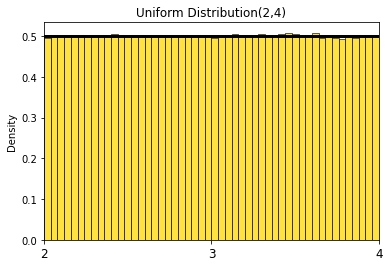

In [ ]:
np.random.seed(1)
N = 1000000
a = 2
b = 4

u_data = np.random.uniform(a, b, N)

f = sns.histplot(u_data, color='#FFD700', stat='density', bins=50)
f.axhline(1/(b-a), color = 'black', linewidth=3)
plt.xlim(a, b)
d = int(np.floor(a))
e = int(np.floor(b)+1)
plt.xticks(list(range(d,e)), fontsize=12, ha='center')
plt.title(f'Uniform Distribution({a},{b})');

In [ ]:
a = 2
b = 4
loc = a
scale = b - loc
print(f'The mean of the U({a},{b}) Distribution is: ', np.round(uniform.mean(loc, scale), 4))
print(f'The median of the U({a},{b}) Distribution is: ', np.round(uniform.median(loc, scale), 4))
print(f'The variance of the U({a},{b}) Distribution is: ', np.round(uniform.var(loc, scale), 4))
print(f'The standard deviation of the U({a},{b}) Distribution is: ', np.round(uniform.std(loc, scale), 4))
print(f'The skewness of the U({a},{b}) Distribution is: ', np.round(uniform.stats(loc, scale, moments='mvsk')[2], 4))
print(f'The kurtosis of the U({a},{b}) Distribution is: ', np.round(uniform.stats(loc, scale, moments='mvsk')[3], 4))

The mean of the U(2,4) Distribution is:  3.0
The median of the U(2,4) Distribution is:  3.0
The variance of the U(2,4) Distribution is:  0.3333
The standard deviation of the U(2,4) Distribution is:  0.5774
The skewness of the U(2,4) Distribution is:  0.0
The kurtosis of the U(2,4) Distribution is:  -1.2


In [ ]:
#Fit a uniform distribution to the data and get the parameters
params = uniform.fit(u_data)

print('a = ', params[0], ',', 'b = ', params[1] + params[0])

a =  2.000000601553743 , b =  3.9999991112403626


Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

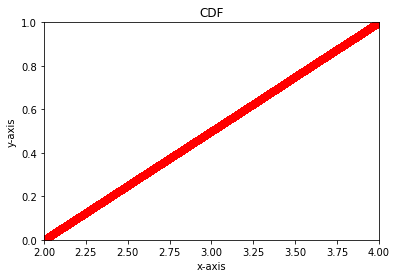

In [ ]:
x = np.sort(u_data)
N = 1000000
#Get the cdf values of y
y = np.arange(N) / float(N)
  
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.xlim(a,b)
plt.ylim(0,1)
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');

To find a point that has a right probability of $p$ use the code below:

''
uniform.isf(p, loc, scale)
''

To find a point that has a left probability of $p$ use the code below:

''
uniform.isf(1-p, loc, scale)
''


In [ ]:
p = 0.75
a = 2
b = 4
loc = a
scale = b - loc
print(f'The point in the U({a},{b}) Distribution that has a right probabilty of *{p}*: ', uniform.isf(p, loc, scale))
print(f'The point in the U({a},{b}) Distribution that has a left probabilty of *{p}*: ', uniform.isf(1-p, loc, scale))

The point in the U(2,4) Distribution that has a right probabilty of *0.75*:  2.5
The point in the U(2,4) Distribution that has a left probabilty of *0.75*:  3.5


To find the left probabilty of a point  use the code below:

''
uniform.cdf(X,loc,scale)
''

To find the right probabilty of a point  use the code below:

''
uniform.sf(X,loc,scale)
''

In [ ]:
X = 3.5
a = 2
b = 4
loc = a
scale = b - loc
print(f'The left probabilty of point *{X}* in the U({a},{b}) Distribution is: ', uniform.cdf(X, loc, scale))
print(f'The Right probabilty of point *{X}* in the U({a},{b}) Distribution is: ', uniform.sf(X, loc, scale))

The left probabilty of point *3.5* in the U(2,4) Distribution is:  0.75
The Right probabilty of point *3.5* in the U(2,4) Distribution is:  0.25


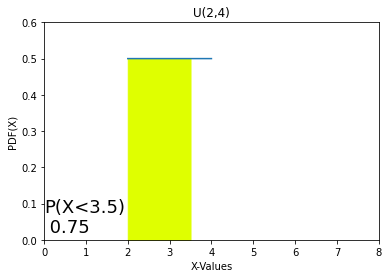

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(a, b, 0.001)
ax.plot(x, uniform.pdf(x, loc, scale))
ax.set_title(f'U({a},{b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(a, X, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 8)
ax.fill_between(px, uniform.pdf(px, loc, scale), color='#DFFF00')

prob = uniform.cdf(X, loc, scale)
ax.text(0, 0.02, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

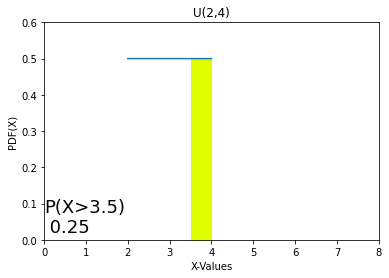

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(a, b, 0.001)
ax.plot(x, uniform.pdf(x, loc, scale))
ax.set_title(f'U({a},{b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, b, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 8)
ax.fill_between(px, uniform.pdf(px, loc, scale), color='#DFFF00')

prob = uniform.sf(X, loc, scale)
ax.text(0, 0.02, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probabilty between two points  use the code below:

''
uniform.cdf(Y,loc,scale) - uniform.cdf(X,loc,scale)
''

$P(u<X<v) = \frac{v-u}{b-a}$

In [ ]:
X = 2.5
Y = 3.5
a = 2
b = 4
loc = a
scale = b - loc
print(f'The probabilty between *({X}, {Y})* in the U({a},{b}) Distribution is: ', uniform.cdf(Y,loc,scale) - uniform.cdf(X,loc,scale))

The probabilty between *(2.5, 3.5)* in the U(2,4) Distribution is:  0.5


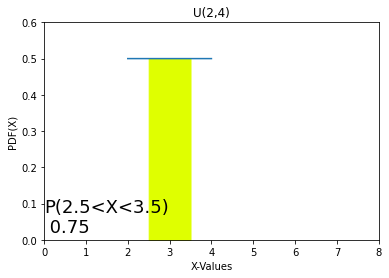

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(a, b, 0.001)
ax.plot(x, uniform.pdf(x, loc, scale))
ax.set_title(f'U({a},{b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 8)
ax.fill_between(px, uniform.pdf(px, loc, scale), color='#DFFF00')

prob = 1-uniform.cdf(X, loc, scale)
ax.text(0, 0.02, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

<a name='Exponential_Distribution'></a>

## **1.6. Exponential Distribution:**

$f_{X}(x) = \lambda e^{-\lambda x} \quad  x  \in  [0, \infty)$

$f(x) = probability\ density\ function$

$\\ $

$E(X) = \frac{1}{\lambda} $

$Var(X) = \frac{1}{\lambda^2}$

$Median(X) = \frac{ln(2)}{\lambda}$

$\\ $

Moment-generating function:

$M_X (t) = \frac{\lambda}{\lambda\ -\ t}$

$\\ $

$CDF = F(X=x) = 1\ -\ e^{-\lambda x}$

$\\ $

$E(X^r) = \frac{r!}{\lambda^r}$

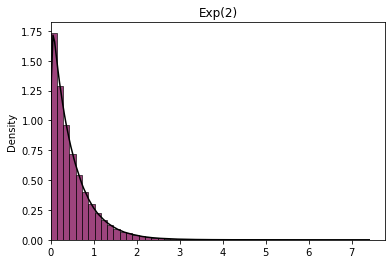

In [ ]:
np.random.seed(1)
N = 1000000
lam = 2

exp_data = np.random.exponential(scale = 1/lam, size = N)

sns.histplot(exp_data, color='#7D0552', stat='density', bins=50)
sns.kdeplot(exp_data, color='black')
plt.xlim(left = 0)
plt.title(f'Exp({lam})');

In [ ]:
lam = 2
print(f'The mean of the Exp({lam}) Distribution is: ', np.round(expon.mean(scale = 1/lam), 4))
print(f'The median of the Exp({lam}) Distribution is: ', np.round(expon.median(scale = 1/lam), 4))
print(f'The variance of the Exp({lam}) Distribution is: ', np.round(expon.var(scale = 1/lam), 4))
print(f'The standard deviation of the Exp({lam}) Distribution is: ', np.round(expon.std(scale = 1/lam), 4))
print(f'The skewness of the Exp({lam}) Distribution is: ', np.round(expon.stats(scale = 1/lam, moments='mvsk')[2], 4))
print(f'The kurtosis of the Exp({lam}) Distribution is: ', np.round(expon.stats(scale = 1/lam, moments='mvsk')[3], 4))

The mean of the Exp(2) Distribution is:  0.5
The median of the Exp(2) Distribution is:  0.3466
The variance of the Exp(2) Distribution is:  0.25
The standard deviation of the Exp(2) Distribution is:  0.5
The skewness of the Exp(2) Distribution is:  2.0
The kurtosis of the Exp(2) Distribution is:  6.0


In [ ]:
#Fit a exponential distribution to the data and get the parameters
params = expon.fit(exp_data)

print('lambda = ', 1/params[1], ',', 'loc = ', params[0])

lambda =  2.001178853905204 , loc =  1.503884582657598e-07


Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

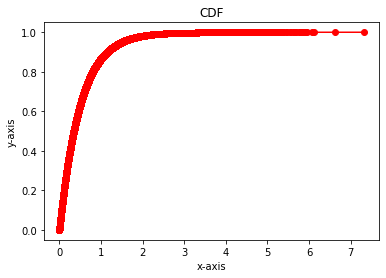

In [ ]:
x = np.sort(exp_data)
N = 1000000
#Get the cdf values of y
y = np.arange(N) / float(N)
  
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');

To find a point that has a right probability of $p$ use the code below:

''
expon.isf(p, loc, scale)
''

To find a point that has a left probability of $p$ use the code below:

''
expon.isf(1-p, loc, scale)
''


In [ ]:
p = math.exp(-2)
lam = 3
print(f'The point in the Exp({lam}) Distribution that has a right probabilty of *{p}*: ', expon.isf(p, scale=1/lam))
print(f'The point in the Exp({lam}) Distribution that has a left probabilty of *{p}*: ', expon.isf(1-p, scale=1/lam))

The point in the Exp(3) Distribution that has a right probabilty of *0.1353352832366127*:  0.6666666666666666
The point in the Exp(3) Distribution that has a left probabilty of *0.1353352832366127*:  0.04847115262295302


To find the left probabilty of a point  use the code below:

''
expon.cdf(X,loc,scale)
''

To find the right probabilty of a point  use the code below:

''
expon.sf(X,loc,scale)
''

In [ ]:
X = 0.5
lam = 3
print(f'The left probabilty of point *{X}* in the Exp({lam}) Distribution is: ', expon.cdf(X, scale=1/lam))
print(f'The Right probabilty of point *{X}* in the Exp({lam})) Distribution is: ', expon.sf(X, scale=1/lam))

The left probabilty of point *0.5* in the Exp(3) Distribution is:  0.7768698398515702
The Right probabilty of point *0.5* in the Exp(3)) Distribution is:  0.22313016014842982


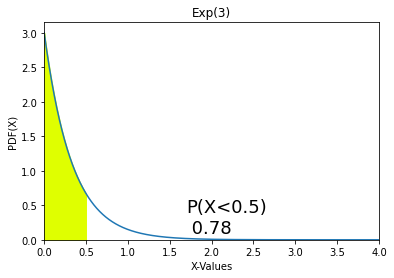

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 4, 0.001)
ax.plot(x, expon.pdf(x, scale = 1/lam))
ax.set_title(f'Exp({lam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(0, X, 0.001)
ax.set_ylim(bottom = 0)
ax.set_xlim(0, 4)
ax.fill_between(px, expon.pdf(px, scale = 1/lam), color='#DFFF00')

prob = expon.cdf(X, scale = 1/lam)
ax.text(1.7, 0.1, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

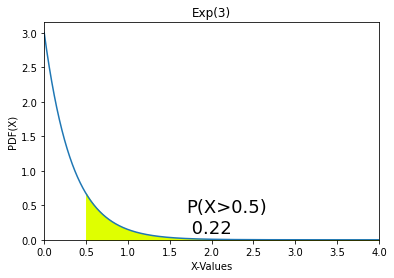

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 4, 0.001)
ax.plot(x, expon.pdf(x, scale = 1/lam))
ax.set_title(f'Exp({lam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, 4, 0.001)
ax.set_ylim(bottom = 0)
ax.set_xlim(0, 4)
ax.fill_between(px, expon.pdf(px, scale = 1/lam), color='#DFFF00')

prob = expon.sf(X, scale = 1/lam)
ax.text(1.7, 0.1, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probabilty between two points  use the code below:

''
expon.cdf(Y,loc,scale) - expon.cdf(X,loc,scale)
''

$P(a<X<b) = e^{-\lambda a} - e^{-\lambda b}$

In [ ]:
X = 0.5
Y = 1
lam = 3
print(f'The probabilty between *({X}, {Y})* in the Exp({lam}) Distribution is: ', expon.cdf(Y, scale=1/lam) - expon.cdf(X, scale=1/lam))

The probabilty between *(0.5, 1)* in the Exp(3) Distribution is:  0.17334309178056584


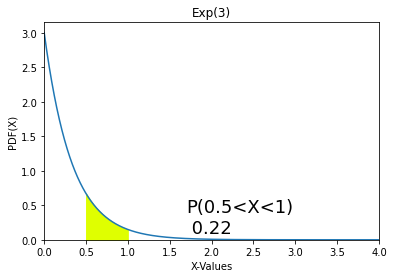

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 4, 0.001)
ax.plot(x, expon.pdf(x, scale=1/lam))
ax.set_title(f'Exp({lam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(bottom = 0)
ax.set_xlim(0, 4)
ax.fill_between(px, expon.pdf(px, scale=1/lam), color='#DFFF00')

prob = 1-expon.cdf(X, scale=1/lam)
ax.text(1.7, 0.1, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

If $X \sim EXP(\lambda) \quad$ then $\quad Y = aX \sim EXP(\frac{\lambda}{a})$

$\\ $

$P(X>s+t\ |\ X>s) = P(X>t)$

<a name='Gamma_Distribution'></a>

## **1.7. Gamma Distribution:**

$f_{X}(x) = \frac{\lambda e^{-\lambda x} {(\lambda x)}^{\alpha-1}}{\Gamma (\alpha)} = \frac{\lambda^{\alpha} e^{-\lambda x} {x}^{\alpha-1}}{\Gamma (\alpha)}\quad  x  \in  [0, \infty)$

$f(x) = probability\ density\ function$

$\\ $

$\Gamma (\alpha) = (\alpha-1)!$

$\Gamma (\frac{1}{2}) = \sqrt{\pi}$

$\\ $

$E(X) = \frac{\alpha}{\lambda} $

$Var(X) = \frac{\alpha}{\lambda^2}$

$E(X^2) = \frac{\alpha\ (\alpha+1)}{\lambda^2} $

$\\ $

Moment-generating function:

$M_X (t) = ({\frac{\lambda}{\lambda\ -\ t}})^\alpha$

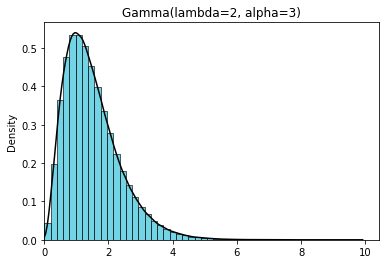

In [ ]:
np.random.seed(1)
N = 1000000
lam = 2
alpha = 3

gam_data = np.random.gamma(shape = alpha, scale = 1/lam, size = N)

sns.histplot(gam_data, color='#43C6DB', stat='density', bins=50)
sns.kdeplot(gam_data, color='black')
plt.xlim(left = 0)
plt.title(f'Gamma(lambda={lam}, alpha={alpha})');

In [ ]:
lam = 2
alpha = 3
print(f'The mean of the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', np.round(gamma.mean(a = alpha, scale = 1/lam), 4))
print(f'The median of the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', np.round(gamma.median(a = alpha, scale = 1/lam), 4))
print(f'The variance of the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', np.round(gamma.var(a = alpha, scale = 1/lam), 4))
print(f'The standard deviation of the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', np.round(gamma.std(a = alpha, scale = 1/lam), 4))
print(f'The skewness of the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', np.round(gamma.stats(a = alpha, scale = 1/lam, moments='mvsk')[2], 4))
print(f'The kurtosis of the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', np.round(gamma.stats(a = alpha, scale = 1/lam, moments='mvsk')[3], 4))

The mean of the Gamma(lambda=2, alpha=3) Distribution is:  1.5
The median of the Gamma(lambda=2, alpha=3) Distribution is:  1.337
The variance of the Gamma(lambda=2, alpha=3) Distribution is:  0.75
The standard deviation of the Gamma(lambda=2, alpha=3) Distribution is:  0.866
The skewness of the Gamma(lambda=2, alpha=3) Distribution is:  1.1547
The kurtosis of the Gamma(lambda=2, alpha=3) Distribution is:  2.0


In [ ]:
#Fit a gamma distribution to the data and get the parameters
params = gamma.fit(gam_data)

print('alpha = ', params[0], ',', 'lambda = ', 1/params[2], ',', 'loc = ', params[1])

alpha =  3.005673983826208 , lambda =  2.0039285150046418 , loc =  -0.0002511581156009133


The gamma distribution curve depends on $\alpha$ and $\lambda$.

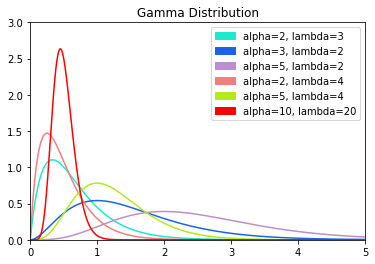

In [ ]:
np.random.seed(1)
N = 100000
x = np.linspace(0, 5, N)
alpha1, alpha2, alpha3, alpha4, alpha5, alpha6 = [2, 3, 5, 2, 5, 10]
lam1, lam2, lam3, lam4, lam5, lam6 = [3, 2, 2, 4, 4, 20]

gam_data1 = gamma.pdf(x, a = alpha1, scale = 1/lam1)
gam_data2 = gamma.pdf(x, a = alpha2, scale = 1/lam2)
gam_data3 = gamma.pdf(x, a = alpha3, scale = 1/lam3)
gam_data4 = gamma.pdf(x, a = alpha4, scale = 1/lam4)
gam_data5 = gamma.pdf(x, a = alpha5, scale = 1/lam5)
gam_data6 = gamma.pdf(x, a = alpha6, scale = 1/lam6)

plt.plot(x, gam_data1, color='#1AEACD')
plt.plot(x, gam_data2, color='#1A62EA')
plt.plot(x, gam_data3, color='#BB8FCE')
plt.plot(x, gam_data4, color='LightCoral')
plt.plot(x, gam_data5, color='#B4EA1A')
plt.plot(x, gam_data6, color='r')

patch1 = mpatches.Patch(color='#1AEACD', label=f'alpha={alpha1}, lambda={lam1}')
patch2 = mpatches.Patch(color='#1A62EA', label=f'alpha={alpha2}, lambda={lam2}')
patch3 = mpatches.Patch(color='#BB8FCE', label=f'alpha={alpha3}, lambda={lam3}')
patch4 = mpatches.Patch(color='LightCoral', label=f'alpha={alpha4}, lambda={lam4}')
patch5 = mpatches.Patch(color='#B4EA1A', label=f'alpha={alpha5}, lambda={lam5}')
patch6 = mpatches.Patch(color='r', label=f'alpha={alpha6}, lambda={lam6}')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], frameon=True);
plt.xlim(0, 5)
plt.ylim(0, 3)
plt.title('Gamma Distribution');

Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

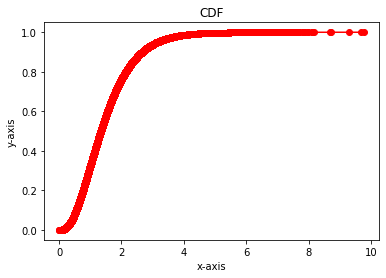

In [ ]:
x = np.sort(gam_data)
N = 1000000
#Get the cdf values of y
y = np.arange(N) / float(N)
  
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');

To find a point that has a right probability of $p$ use the code below:

''
gamma.isf(p, a, scale)
''

To find a point that has a left probability of $p$ use the code below:

''
gamma.isf(1-p, a, scale)
''


In [ ]:
p = 0.9
alpha = 3
lam = 2
print(f'The point in the Gamma(lambda={lam}, alpha={alpha}) Distribution that has a right probabilty of *{p}*: ', gamma.isf(p, a = alpha, scale = 1/lam))
print(f'The point in the Gamma(lambda={lam}, alpha={alpha}) Distribution that has a left probabilty of *{p}*: ', gamma.isf(1-p, a = alpha, scale = 1/lam))

The point in the Gamma(lambda=2, alpha=3) Distribution that has a right probabilty of *0.9*:  0.5510326641246606
The point in the Gamma(lambda=2, alpha=3) Distribution that has a left probabilty of *0.9*:  2.661160168917105


To find the left probabilty of a point  use the code below:

''
gamma.cdf(X, a, scale)
''

To find the right probabilty of a point  use the code below:

''
gamma.sf(X, a, scale)
''

In [ ]:
X = 1
alpha = 3
lam = 2
print(f'The left probabilty of *{X}* in the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', gamma.cdf(X, a = alpha, scale = 1/lam))
print(f'The Right probabilty of *{X}* in the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', gamma.sf(X, a = alpha, scale = 1/lam))

The left probabilty of *1* in the Gamma(lambda=2, alpha=3) Distribution is:  0.32332358381693654
The Right probabilty of *1* in the Gamma(lambda=2, alpha=3) Distribution is:  0.6766764161830634


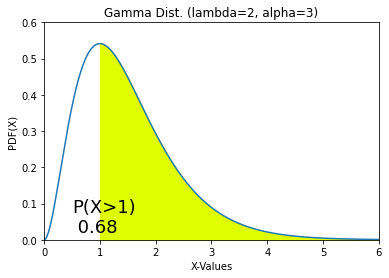

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 6, 0.001)
ax.plot(x, gamma.pdf(x, a = alpha, scale = 1/lam))
ax.set_title(f'Gamma Dist. (lambda={lam}, alpha={alpha})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, 6, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 6)
ax.fill_between(px, gamma.pdf(px, a = alpha, scale = 1/lam), color='#DFFF00')

prob = gamma.sf(X, a = alpha, scale = 1/lam)
ax.text(0.5, 0.02, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

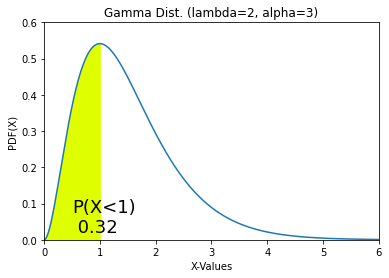

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 6, 0.001)
ax.plot(x, gamma.pdf(x, a = alpha, scale = 1/lam))
ax.set_title(f'Gamma Dist. (lambda={lam}, alpha={alpha})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(0, X, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 6)
ax.fill_between(px, gamma.pdf(px, a = alpha, scale = 1/lam), color='#DFFF00')

prob = gamma.cdf(X, a = alpha, scale = 1/lam)
ax.text(0.5, 0.02, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probabilty between two points  use the code below:

''
gamma.cdf(Y, a, scale) - gamma.cdf(X, a, scale)
''

In [ ]:
X = 1
Y = 3
alpha = 3
lam = 2
print(f'The probabilty between *({X}, {Y})* in the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', gamma.cdf(Y, a = alpha, scale = 1/lam) - gamma.cdf(X, a = alpha, scale = 1/lam))

The probabilty between *(1, 3)* in the Gamma(lambda=2, alpha=3) Distribution is:  0.6147076117664045


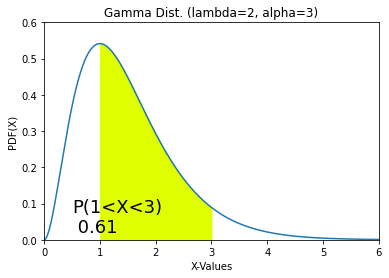

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 6, 0.001)
ax.plot(x, gamma.pdf(x, a = alpha, scale = 1/lam))
ax.set_title(f'Gamma Dist. (lambda={lam}, alpha={alpha})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 6)
ax.fill_between(px, gamma.pdf(px, a = alpha, scale = 1/lam), color='#DFFF00')

prob = gamma.cdf(Y, a = alpha, scale = 1/lam) - gamma.cdf(X, a = alpha, scale = 1/lam)
ax.text(0.5, 0.02, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

$X \sim Gamma(\alpha,\lambda)\quad if\ \alpha \in integer \quad$ then $\quad X \sim Erlang(\alpha,\lambda)$

$X \sim Gamma(\alpha,\lambda)\quad if\ \alpha = 1 \quad$ then $\quad X \sim Exp(\lambda)$

<a name='Beta_Distribution'></a>

## **1.8. Beta Distribution:**

$f_{X}(x) = \frac{\Gamma{(a\ +\ b)}}{\Gamma{(a)}\ \Gamma{(b)}}\ x^{a-1}\ (1-x)^{b-1}\quad  x  \in  (0, 1)$

$f(x) = probability\ density\ function$

$\\ $

$\Gamma (\alpha) = (\alpha-1)!$

$\Gamma (\frac{1}{2}) = \sqrt{\pi}$

$\\ $

$E(X) = \frac{a}{a\ +\ b} $

$Var(X) = \frac{ab}{(a\ +\ b)^2 (a\ +\ b\ +\ 1)}$

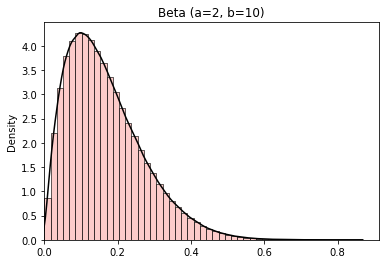

In [ ]:
np.random.seed(1)
N = 1000000
a = 2
b = 10

beta_data = np.random.beta(a = a, b = b, size = N)

sns.histplot(beta_data, color='#FBBBB9', stat='density', bins=50)
sns.kdeplot(beta_data, color='black')
plt.xlim(left = 0)
plt.title(f'Beta (a={a}, b={b})');

In [ ]:
a = 2
b = 10
print(f'The mean of the Beta(a={a}, b={b}) Distribution is: ', np.round(beta.mean(a, b), 4))
print(f'The median of the Beta(a={a}, b={b}) Distribution is: ', np.round(beta.median(a, b), 4))
print(f'The variance of the Beta(a={a}, b={b}) Distribution is: ', np.round(beta.var(a, b), 4))
print(f'The standard deviation of the Beta(a={a}, b={b}) Distribution is: ', np.round(beta.std(a, b), 4))
print(f'The skewness of the Beta(a={a}, b={b}) Distribution is: ', np.round(beta.stats(a, b, moments='mvsk')[2], 4))
print(f'The kurtosis of the Beta(a={a}, b={b}) Distribution is: ', np.round(beta.stats(a, b, moments='mvsk')[3], 4))

The mean of the Beta(a=2, b=10) Distribution is:  0.1667
The median of the Beta(a=2, b=10) Distribution is:  0.148
The variance of the Beta(a=2, b=10) Distribution is:  0.0107
The standard deviation of the Beta(a=2, b=10) Distribution is:  0.1034
The skewness of the Beta(a=2, b=10) Distribution is:  0.9214
The kurtosis of the Beta(a=2, b=10) Distribution is:  0.7886


In [ ]:
#Fit a beta distribution to the data and get the parameters
params = beta.fit(beta_data)
params
print('a = ', params[0], ',', 'b = ', params[1], ',', 'loc = ', params[2], ',', 'scale = ', params[3])

a =  2.000291137531903 , b =  9.98671415801262 , loc =  7.581153750419586e-06 , scale =  0.9986098816575184


The beta distribution curve depends on $a$ and $b$.

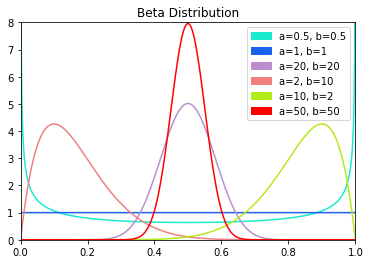

In [ ]:
np.random.seed(1)
N = 100000
x = np.linspace(0, 1, N)
a1, a2, a3, a4, a5, a6 = [0.5, 1, 20, 2, 10, 50]
b1, b2, b3, b4, b5, b6 = [0.5, 1, 20, 10, 2, 50]

beta_data1 = beta.pdf(x, a = a1, b = b1)
beta_data2 = beta.pdf(x, a = a2, b = b2)
beta_data3 = beta.pdf(x, a = a3, b = b3)
beta_data4 = beta.pdf(x, a = a4, b = b4)
beta_data5 = beta.pdf(x, a = a5, b = b5)
beta_data6 = beta.pdf(x, a = a6, b = b6)

plt.plot(x, beta_data1, color='#1AEACD')
plt.plot(x, beta_data2, color='#1A62EA')
plt.plot(x, beta_data3, color='#BB8FCE')
plt.plot(x, beta_data4, color='LightCoral')
plt.plot(x, beta_data5, color='#B4EA1A')
plt.plot(x, beta_data6, color='r')

patch1 = mpatches.Patch(color='#1AEACD', label=f'a={a1}, b={b1}')
patch2 = mpatches.Patch(color='#1A62EA', label=f'a={a2}, b={b2}')
patch3 = mpatches.Patch(color='#BB8FCE', label=f'a={a3}, b={b3}')
patch4 = mpatches.Patch(color='LightCoral', label=f'a={a4}, b={b4}')
patch5 = mpatches.Patch(color='#B4EA1A', label=f'a={a5}, b={b5}')
patch6 = mpatches.Patch(color='r', label=f'a={a6}, b={b6}')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], frameon=True);
plt.xlim(0, 1)
plt.ylim(0, 8)
plt.title('Beta Distribution');

Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

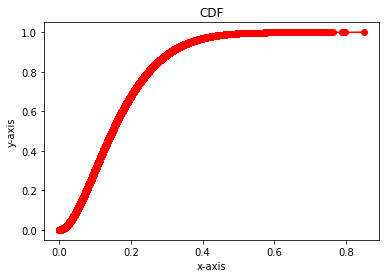

In [ ]:
x = np.sort(beta_data)
N = 1000000
#Get the cdf values of y
y = np.arange(N) / float(N)
  
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');

To find a point that has a right probability of $p$ use the code below:

''
beta.isf(p, a, b)
''

To find a point that has a left probability of $p$ use the code below:

''
beta.isf(1-p, a, b)
''


In [ ]:
p = 0.7
a = 2
b = 10
print(f'The point in the Beta(a={a}, b={b}) Distribution that has a right probabilty of *{p}*: ', beta.isf(p, a = a, b = b))
print(f'The point in the Beta(a={a}, b={b}) Distribution that has a left probabilty of *{p}*: ', beta.isf(1-p, a = a, b = b))

The point in the Beta(a=2, b=10) Distribution that has a right probabilty of *0.7*:  0.09937978155154288
The point in the Beta(a=2, b=10) Distribution that has a left probabilty of *0.7*:  0.20767611743114214


To find the left probabilty of a point  use the code below:

''
beta.cdf(X, a, b)
''

To find the right probabilty of a point  use the code below:

''
beta.sf(X, a, b)
''

In [ ]:
X = 0.2
a = 2
b = 10
print(f'The left probabilty of *{X}* in the Beta(a={a}, b={b}) Distribution is: ', beta.cdf(X, a = a, b = b))
print(f'The Right probabilty of *{X}* in the Beta(a={a}, b={b}) Distribution is: ', beta.sf(X, a = a, b = b))

The left probabilty of *0.2* in the Beta(a=2, b=10) Distribution is:  0.6778774527999998
The Right probabilty of *0.2* in the Beta(a=2, b=10) Distribution is:  0.32212254720000016


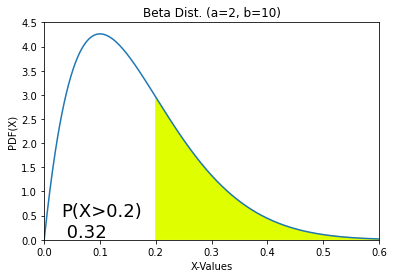

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 0.6, 0.001)
ax.plot(x, beta.pdf(x, a, b))
ax.set_title(f'Beta Dist. (a={a}, b={b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, 6, 0.001)
ax.set_ylim(0, 4.5)
ax.set_xlim(0, 0.6)
ax.fill_between(px, beta.pdf(px, a, b), color='#DFFF00')

prob = beta.sf(X, a, b)
ax.text(0.03, 0.05, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

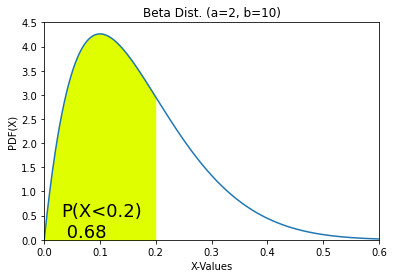

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 0.6, 0.001)
ax.plot(x, beta.pdf(x, a, b))
ax.set_title(f'Beta Dist. (a={a}, b={b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(0, X, 0.001)
ax.set_ylim(0, 4.5)
ax.set_xlim(0, 0.6)
ax.fill_between(px, beta.pdf(px, a, b), color='#DFFF00')

prob = beta.cdf(X, a, b)
ax.text(0.03, 0.05, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probabilty between two points  use the code below:

''
beta.cdf(Y, a, scale) - beta.cdf(X, a, scale)
''

In [ ]:
X = 0.1
Y = 0.2
a = 2
b = 10
print(f'The probabilty between *({X}, {Y})* in the Beta(a={a}, b={b}) Distribution is: ', beta.cdf(Y, a, b) - beta.cdf(X, a, b))

The probabilty between *(0.1, 0.2)* in the Beta(a=2, b=10) Distribution is:  0.37523433299999975


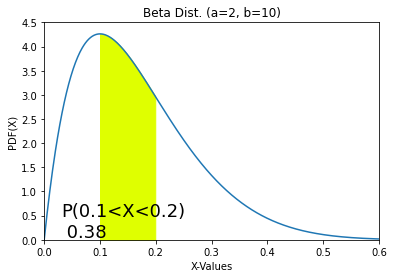

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 0.6, 0.001)
ax.plot(x, beta.pdf(x, a, b))
ax.set_title(f'Beta Dist. (a={a}, b={b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 4.5)
ax.set_xlim(0, 0.6)
ax.fill_between(px, beta.pdf(px, a, b), color='#DFFF00')

prob = beta.cdf(Y, a, b) - beta.cdf(X, a, b)
ax.text(0.03, 0.05, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

$X \sim beta(a,b)\quad if\ a=b=1 \quad$ then $\quad X \sim U(0,1)$

<a name='Weibull_Distribution'></a>

## **1.9. Weibull Distribution:**

$f_{X}(x) = \beta\ \lambda\ x^{\beta -1}\ e^{-\lambda x^{\beta}} \quad  x  \in  (0, \infty)$

$f(x) = probability\ density\ function$

$\\ $

$E(X) = \frac{1}{\sqrt[\beta]{\lambda}} (1+ \frac{1}{\beta})$

$Var(X) = \frac{1}{\sqrt[\beta]{\lambda}} [\Gamma (1+\frac{2}{\beta}) - [\Gamma(1+\frac{1}{\beta})]^2]$

$\\ $

$CDF = F(X=x) = 1\ -\ e^{- \lambda x^{\beta}}$

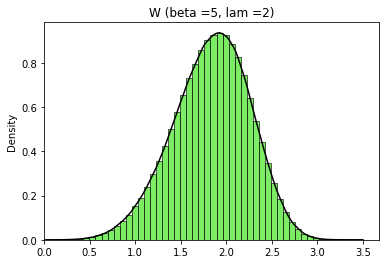

In [ ]:
np.random.seed(1)
N = 1000000
bet, lam = [5, 2]

wei_data = weibull_min.rvs(bet, loc=0, scale=lam, size=N)

sns.histplot(wei_data, color='#4fe630', stat='density', bins=50)
sns.kdeplot(wei_data, color='black')
plt.xlim(left = 0)
plt.title(f'W (beta ={bet}, lam ={lam})');

In [ ]:
bet, lam = [5, 2]
print(f'The mean of the W(beta={bet}, lam={lam}) Distribution is: ', np.round(weibull_min.mean(bet, scale=lam), 4))
print(f'The median of the W(beta={bet}, lam={lam}) Distribution is: ', np.round(weibull_min.median(bet, scale=lam), 4))
print(f'The variance of the W(beta={bet}, lam={lam}) Distribution is: ', np.round(weibull_min.var(bet, scale=lam), 4))
print(f'The standard deviation of the W(beta={bet}, lam={lam}) Distribution is: ', np.round(weibull_min.std(bet, scale=lam), 4))
print(f'The skewness of the W(beta={bet}, lam={lam}) Distribution is: ', np.round(weibull_min.stats(bet, scale=lam, moments='mvsk')[2], 4))
print(f'The kurtosis of the W(beta={bet}, lam={lam}) Distribution is: ', np.round(weibull_min.stats(bet, scale=lam, moments='mvsk')[3], 4))

The mean of the W(beta=5, lam=2) Distribution is:  1.8363
The median of the W(beta=5, lam=2) Distribution is:  1.8586
The variance of the W(beta=5, lam=2) Distribution is:  0.1769
The standard deviation of the W(beta=5, lam=2) Distribution is:  0.4206
The skewness of the W(beta=5, lam=2) Distribution is:  -0.2541
The kurtosis of the W(beta=5, lam=2) Distribution is:  -0.1197


In [ ]:
#Fit a weibull distribution to the data and get the parameters
params = weibull_min.fit(wei_data)
print('beta = ', params[0], ',', 'lam = ', params[2], ',','loc = ', params[1])

beta =  4.991247156643537 , lam =  1.9952589875551174 , loc =  0.00451953387404824


The weibull distribution curve depends on $\beta$ and $\lambda$.

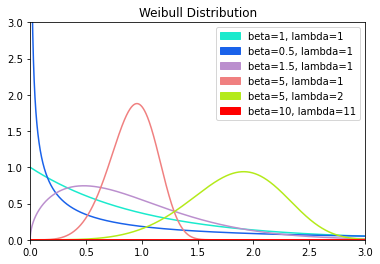

In [ ]:
np.random.seed(1)
N = 100000
x = np.linspace(0, 3, N)
b1, b2, b3, b4, b5, b6 = [1, 0.5, 1.5, 5, 5, 10]
lam1, lam2, lam3, lam4, lam5, lam6 = [1, 1, 1, 1, 2, 11]

wei_data1 = weibull_min.pdf(x, b1, scale = lam1)
wei_data2 = weibull_min.pdf(x, b2, scale = lam2)
wei_data3 = weibull_min.pdf(x, b3, scale = lam3)
wei_data4 = weibull_min.pdf(x, b4, scale = lam4)
wei_data5 = weibull_min.pdf(x, b5, scale = lam5)
wei_data6 = weibull_min.pdf(x, b6, scale = lam6)

plt.plot(x, wei_data1, color='#1AEACD')
plt.plot(x, wei_data2, color='#1A62EA')
plt.plot(x, wei_data3, color='#BB8FCE')
plt.plot(x, wei_data4, color='LightCoral')
plt.plot(x, wei_data5, color='#B4EA1A')
plt.plot(x, wei_data6, color='r')

patch1 = mpatches.Patch(color='#1AEACD', label=f'beta={b1}, lambda={lam1}')
patch2 = mpatches.Patch(color='#1A62EA', label=f'beta={b2}, lambda={lam2}')
patch3 = mpatches.Patch(color='#BB8FCE', label=f'beta={b3}, lambda={lam3}')
patch4 = mpatches.Patch(color='LightCoral', label=f'beta={b4}, lambda={lam4}')
patch5 = mpatches.Patch(color='#B4EA1A', label=f'beta={b5}, lambda={lam5}')
patch6 = mpatches.Patch(color='r', label=f'beta={b6}, lambda={lam6}')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], frameon=True);
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.title('Weibull Distribution');

Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

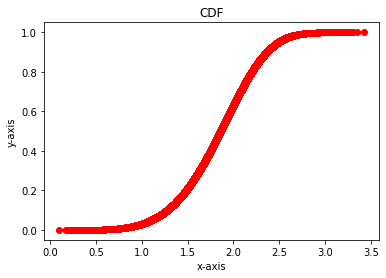

In [ ]:
x = np.sort(wei_data)
N = 1000000
#Get the cdf values of y
y = np.arange(N) / float(N)
  
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');

To find a point that has a right probability of $p$ use the code below:

''
weibull_min.isf(p, bet, scale = lam)
''

To find a point that has a left probability of $p$ use the code below:

''
weibull_min.isf(1-p, bet, scale = lam)
''


In [ ]:
p = 0.7
bet, lam = [5, 2]
print(f'The point in the W(beta={bet}, lam={lam}) Distribution that has a right probabilty of *{p}*: ', weibull_min.isf(p, bet, scale = lam))
print(f'The point in the W(beta={bet}, lam={lam}) Distribution that has a left probabilty of *{p}*: ', weibull_min.isf(1-p, bet, scale = lam))

The point in the W(beta=5, lam=2) Distribution that has a right probabilty of *0.7*:  1.6273632938337603
The point in the W(beta=5, lam=2) Distribution that has a left probabilty of *0.7*:  2.0756462113012253


To find the left probabilty of a point  use the code below:

''
weibull_min.cdf(X, bet, scale = lam)
''

To find the right probabilty of a point  use the code below:

''
weibull_min.sf(X, bet, scale = lam)
''

In [ ]:
X = 1.5
bet, lam = [5, 2]
print(f'The left probabilty of *{X}* in the W(beta={bet}, lam={lam}) Distribution is: ', weibull_min.cdf(X, bet, scale = lam))
print(f'The Right probabilty of *{X}* in the W(beta={bet}, lam={lam}) Distribution is: ', weibull_min.sf(X, bet, scale = lam))

The left probabilty of *1.5* in the W(beta=5, lam=2) Distribution is:  0.2112490711463823
The Right probabilty of *1.5* in the W(beta=5, lam=2) Distribution is:  0.7887509288536177


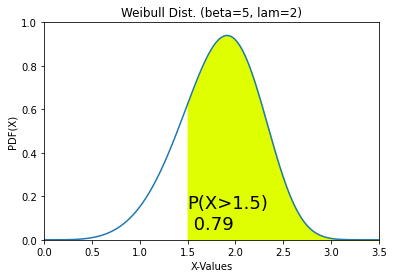

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 3.5, 0.001)
ax.plot(x, weibull_min.pdf(x, bet, scale = lam))
ax.set_title(f'Weibull Dist. (beta={bet}, lam={lam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, 3.5, 0.001)
ax.set_ylim(0, 1)
ax.set_xlim(0, 3.5)
ax.fill_between(px, weibull_min.pdf(px, bet, scale = lam), color='#DFFF00')

prob = weibull_min.sf(X, bet, scale = lam)
ax.text(1.5, 0.05, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

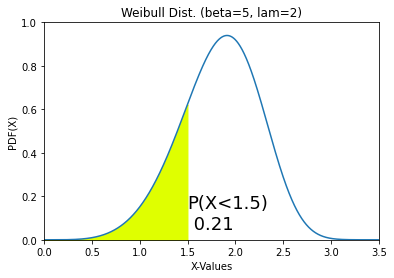

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 3.5, 0.001)
ax.plot(x, weibull_min.pdf(x, bet, scale = lam))
ax.set_title(f'Weibull Dist. (beta={bet}, lam={lam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(0, X, 0.001)
ax.set_ylim(0, 1)
ax.set_xlim(0, 3.5)
ax.fill_between(px, weibull_min.pdf(px, bet, scale = lam), color='#DFFF00')

prob = weibull_min.cdf(X, bet, scale = lam)
ax.text(1.5, 0.05, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probabilty between two points  use the code below:

''
weibull_min.cdf(Y, bet, scale = lam) - weibull_min.cdf(X, bet, scale = lam)
''

In [ ]:
X = 1.5
Y = 2.5
bet, lam = [5, 2]
print(f'The probabilty between *({X}, {Y})* in the W(beta={bet}, lam={lam}) Distribution is: ', weibull_min.cdf(Y, bet, scale = lam) - weibull_min.cdf(X, bet, scale = lam))

The probabilty between *(1.5, 2.5)* in the W(beta=5, lam=2) Distribution is:  0.7414751794473271


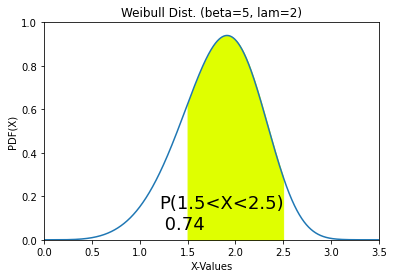

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 3.5, 0.001)
ax.plot(x, weibull_min.pdf(x, bet, scale = lam))
ax.set_title(f'Weibull Dist. (beta={bet}, lam={lam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 1)
ax.set_xlim(0, 3.5)
ax.fill_between(px, weibull_min.pdf(px, bet, scale = lam), color='#DFFF00')

prob = weibull_min.cdf(Y, bet, scale = lam) - weibull_min.cdf(X, bet, scale = lam)
ax.text(1.2, 0.05, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

$X \sim W(\beta,\lambda)\quad if\ \beta =1 \quad$ then $\quad X \sim EXP(\lambda)$

<a name='Cauchy_Distribution'></a>

## **1.10. Cauchy Distribution:**

$f_{X}(x) = \frac{1}{\pi \gamma [1+(\frac{x-x_0}{\gamma})^2]} \quad  x  \in  (- \infty, \infty)$

$f(x) = probability\ density\ function$

$\\ $

$E(X) = undefined$

$Var(X) = undefined$

$Median(X) = 0$

$\\ $

If $x_0 = 0$ and $\gamma = 1$ the probability distribution changes to the standard Cauchy distribution.

$f_{X}(x) = \frac{1}{\pi (1+x^2)}$

$\\ $

$CDF = F(X=x) = \frac{1}{\pi} arctan(\frac{x-x_0}{\gamma})+\frac{1}{2}$

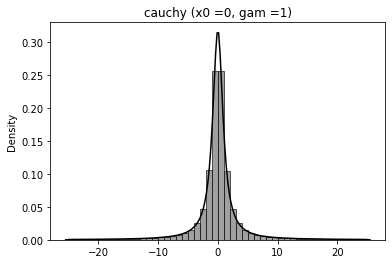

In [10]:
np.random.seed(1)
N = 10000000
x0, gam = [0, 1]

cau_data = np.random.standard_cauchy(size = N)
cau_data = cau_data[(cau_data>-25) & (cau_data<25)]
sns.histplot(cau_data, color='gray', stat='density', bins=50)
sns.kdeplot(cau_data, color='black')
plt.title(f'cauchy (x0 ={x0}, gam ={gam})');

In [12]:
x0, gam = [0, 1]
print(f'The mean of the Cauchy(x0={x0}, gam={gam}) Distribution is: ', np.round(cauchy.mean(loc=0, scale=1), 4))
print(f'The median of the Cauchy(x0={x0}, gam={gam}) Distribution is: ', np.round(cauchy.median(loc=0, scale=1), 4))
print(f'The variance of the Cauchy(x0={x0}, gam={gam}) Distribution is: ', np.round(cauchy.var(loc=0, scale=1), 4))
print(f'The standard deviation of the Cauchy(x0={x0}, gam={gam}) Distribution is: ', np.round(cauchy.std(loc=0, scale=1), 4))
print(f'The skewness of the Cauchy(x0={x0}, gam={gam}) Distribution is: ', np.round(cauchy.stats(loc=0, scale=1, moments='mvsk')[2], 4))
print(f'The kurtosis of the Cauchy(x0={x0}, gam={gam}) Distribution is: ', np.round(cauchy.stats(loc=0, scale=1, moments='mvsk')[3], 4))

The mean of the Cauchy(x0=0, gam=1) Distribution is:  nan
The median of the Cauchy(x0=0, gam=1) Distribution is:  0.0
The variance of the Cauchy(x0=0, gam=1) Distribution is:  nan
The standard deviation of the Cauchy(x0=0, gam=1) Distribution is:  nan
The skewness of the Cauchy(x0=0, gam=1) Distribution is:  nan
The kurtosis of the Cauchy(x0=0, gam=1) Distribution is:  nan


In [13]:
#Fit a cauchy distribution to the data and get the parameters
params = cauchy.fit(cau_data)
print('loc = ', params[0], ',', 'gam = ', params[1])

loc =  -0.0008540357173467919 , gam =  0.9508218438117712


The weibull distribution curve depends on $x_0$ and $\gamma$.

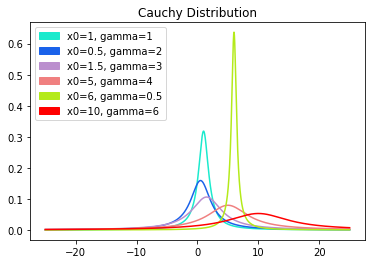

In [14]:
np.random.seed(1)
N = 100000
x = np.linspace(-25, 25, N)
x1, x2, x3, x4, x5, x6 = [1, 0.5, 1.5, 5, 6, 10]
gam1, gam2, gam3, gam4, gam5, gam6 = [1, 2, 3, 4, 0.5, 6]

cau_data1 = cauchy.pdf(x, loc = x1, scale = gam1)
cau_data2 = cauchy.pdf(x, loc = x2, scale = gam2)
cau_data3 = cauchy.pdf(x, loc = x3, scale = gam3)
cau_data4 = cauchy.pdf(x, loc = x4, scale = gam4)
cau_data5 = cauchy.pdf(x, loc = x5, scale = gam5)
cau_data6 = cauchy.pdf(x, loc = x6, scale = gam6)

plt.plot(x, cau_data1, color='#1AEACD')
plt.plot(x, cau_data2, color='#1A62EA')
plt.plot(x, cau_data3, color='#BB8FCE')
plt.plot(x, cau_data4, color='LightCoral')
plt.plot(x, cau_data5, color='#B4EA1A')
plt.plot(x, cau_data6, color='r')

patch1 = mpatches.Patch(color='#1AEACD', label=f'x0={x1}, gamma={gam1}')
patch2 = mpatches.Patch(color='#1A62EA', label=f'x0={x2}, gamma={gam2}')
patch3 = mpatches.Patch(color='#BB8FCE', label=f'x0={x3}, gamma={gam3}')
patch4 = mpatches.Patch(color='LightCoral', label=f'x0={x4}, gamma={gam4}')
patch5 = mpatches.Patch(color='#B4EA1A', label=f'x0={x5}, gamma={gam5}')
patch6 = mpatches.Patch(color='r', label=f'x0={x6}, gamma={gam6}')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], frameon=True);
#plt.xlim(0, 3)
#plt.ylim(0, 3)
plt.title('Cauchy Distribution');

Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

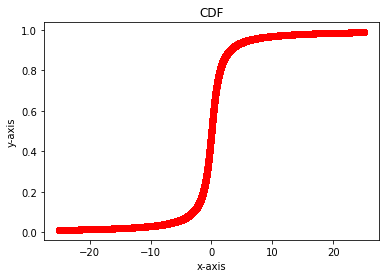

In [19]:
N = 100000
x = np.linspace(-25, 25, N)

#Get the cdf values of y
y = cauchy.cdf(x, loc=0, scale=1)
  
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');

To find a point that has a right probability of $p$ use the code below:

''
cauchy.isf(p, loc = x0, scale = gamma)
''

To find a point that has a left probability of $p$ use the code below:

''
cauchy.isf(1-p, loc = x0, scale = gamma)
''


In [20]:
p = 0.7
x0, gam = [0, 1]
print(f'The point in the Cauchy(x0={x0}, gam={gam}) Distribution that has a right probabilty of *{p}*: ', cauchy.isf(p, loc = x0, scale = gam))
print(f'The point in the Cauchy(x0={x0}, gam={gam}) Distribution that has a left probabilty of *{p}*: ', cauchy.isf(1-p, loc = x0, scale = gam))

The point in the Cauchy(x0=0, gam=1) Distribution that has a right probabilty of *0.7*:  -0.7265425280053609
The point in the Cauchy(x0=0, gam=1) Distribution that has a left probabilty of *0.7*:  0.7265425280053607


To find the left probabilty of a point  use the code below:

''
cauchy.cdf(X, loc = x0, scale = gamma)
''

To find the right probabilty of a point  use the code below:

''
cauchy.sf(X, loc = x0, scale = gamma)
''

In [25]:
X = 0.5
x0, gam = [0, 1]
print(f'The left probabilty of *{X}* in the Cauchy(x0={x0}, gam={gam}) Distribution is: ', cauchy.cdf(X, loc = x0, scale = gam))
print(f'The Right probabilty of *{X}* in the Cauchy(x0={x0}, gam={gam}) Distribution is: ', cauchy.sf(X, loc = x0, scale = gam))

The left probabilty of *0.5* in the Cauchy(x0=0, gam=1) Distribution is:  0.6475836176504333
The Right probabilty of *0.5* in the Cauchy(x0=0, gam=1) Distribution is:  0.35241638234956674


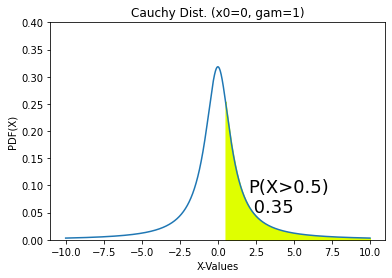

In [31]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(-10, 10, 0.001)
ax.plot(x, cauchy.pdf(x, loc = x0, scale = gam))
ax.set_title(f'Cauchy Dist. (x0={x0}, gam={gam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, 10, 0.001)
ax.set_ylim(0, 0.4)
ax.fill_between(px, cauchy.pdf(px, loc = x0, scale = gam), color='#DFFF00')

prob = cauchy.sf(X, loc = x0, scale = gam)
ax.text(2, 0.05, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

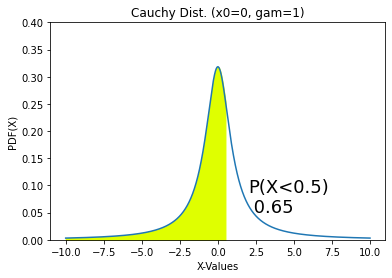

In [35]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(-10, 10, 0.001)
ax.plot(x, cauchy.pdf(x, loc = x0, scale = gam))
ax.set_title(f'Cauchy Dist. (x0={x0}, gam={gam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(-10, X, 0.001)
ax.set_ylim(0, 0.4)
ax.fill_between(px, cauchy.pdf(px, loc = x0, scale = gam), color='#DFFF00')

prob = cauchy.cdf(X, loc = x0, scale = gam)
ax.text(2, 0.05, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probabilty between two points  use the code below:

''
cauchy.cdf(Y, loc = x0, scale = gamma) - cauchy.cdf(X, loc = x0, scale = gamma)
''

In [39]:
X = 0
Y = 1
x0, gam = [0, 1]
print(f'The probabilty between *({X}, {Y})* in the Cauchy(x0={x0}, gam={gam}) Distribution is: ', cauchy.cdf(Y, loc = x0, scale = gam) - cauchy.cdf(X, loc = x0, scale = gam))

The probabilty between *(0, 1)* in the Cauchy(x0=0, gam=1) Distribution is:  0.25


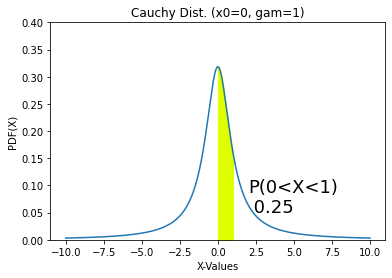

In [41]:
fig, ax = plt.subplots()
#Distribution curve
x = np.arange(-10, 10, 0.001)
ax.plot(x, cauchy.pdf(x, loc = x0, scale = gam))
ax.set_title(f'Cauchy Dist. (x0={x0}, gam={gam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 0.4)
ax.fill_between(px, cauchy.pdf(px, loc = x0, scale = gam), color='#DFFF00')

prob = cauchy.cdf(Y, loc = x0, scale = gam) - cauchy.cdf(X, loc = x0, scale = gam)
ax.text(2, 0.05, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

<a name='Laplace_Distribution'></a>

## **1.11. Laplace Distribution:**

$f_{X}(x) = \frac{1}{2b}\ exp(-\frac{|x-\mu|}{b}) \quad  x  \in  (- \infty, \infty)$

$f(x) = probability\ density\ function$

$\\ $

$E(X) = \mu$

$Var(X) = 2b^2$

$Median(X) = \mu$

$Mode(X) = \mu$

$Skewness(X) = 0$

$Kurtosis(X) = 3$

$\\ $

If $\mu = 0$ and $b = 1$ the positive half-line is exactly an exponential distribution scaled by $\frac{1}{2}$.

$\\ $

$CDF = F(X=x) = \begin{cases}\frac{1}{2}\ exp(\frac{x-\mu}{b}) & x \leq \mu\\1-\frac{1}{2}\ exp(-\frac{x-\mu}{b}) & x \geq \mu \end{cases}$

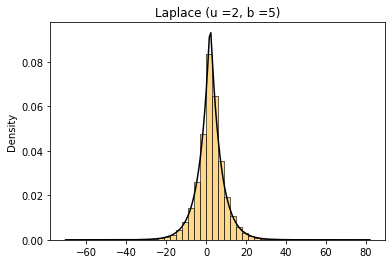

In [44]:
np.random.seed(1)
N = 10000000
u, b = [2, 5]

lap_data = np.random.laplace(loc=u, scale=b, size = N)
sns.histplot(lap_data, color='#ffcc66', stat='density', bins=50)
sns.kdeplot(lap_data, color='black')
plt.title(f'Laplace (u={u}, b={b})');

In [46]:
u, b = [2, 5]
print(f'The mean of the Laplace(u={u}, b={b}) Distribution is: ', np.round(laplace.mean(loc=u, scale=b), 4))
print(f'The median of the Laplace(u={u}, b={b}) Distribution is: ', np.round(laplace.median(loc=u, scale=b), 4))
print(f'The variance of the Laplace(u={u}, b={b}) Distribution is: ', np.round(laplace.var(loc=u, scale=b), 4))
print(f'The standard deviation of the Laplace(u={u}, b={b}) Distribution is: ', np.round(laplace.std(loc=u, scale=b), 4))
print(f'The skewness of the Laplace(u={u}, b={b}) Distribution is: ', np.round(laplace.stats(loc=u, scale=b, moments='mvsk')[2], 4))
print(f'The kurtosis of the Laplace(u={u}, b={b}) Distribution is: ', np.round(laplace.stats(loc=u, scale=b, moments='mvsk')[3], 4))

The mean of the Laplace(u=2, b=5) Distribution is:  2.0
The median of the Laplace(u=2, b=5) Distribution is:  2.0
The variance of the Laplace(u=2, b=5) Distribution is:  50.0
The standard deviation of the Laplace(u=2, b=5) Distribution is:  7.0711
The skewness of the Laplace(u=2, b=5) Distribution is:  0.0
The kurtosis of the Laplace(u=2, b=5) Distribution is:  3.0


In [47]:
#Fit a laplace distribution to the data and get the parameters
params = laplace.fit(lap_data)
print('u = ', params[0], ',', 'b = ', params[1])

u =  1.9980479365590247 , b =  5.000667183213817


The weibull distribution curve depends on $\mu$ and $b$.

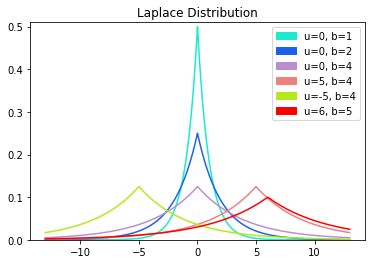

In [54]:
np.random.seed(1)
N = 100000
x = np.linspace(-13, 13, N)
u1, u2, u3, u4, u5, u6 = [0, 0, 0, 5, -5, 6]
b1, b2, b3, b4, b5, b6 = [1, 2, 4, 4, 4, 5]

lap_data1 = laplace.pdf(x, loc = u1, scale = b1)
lap_data2 = laplace.pdf(x, loc = u2, scale = b2)
lap_data3 = laplace.pdf(x, loc = u3, scale = b3)
lap_data4 = laplace.pdf(x, loc = u4, scale = b4)
lap_data5 = laplace.pdf(x, loc = u5, scale = b5)
lap_data6 = laplace.pdf(x, loc = u6, scale = b6)

plt.plot(x, lap_data1, color='#1AEACD')
plt.plot(x, lap_data2, color='#1A62EA')
plt.plot(x, lap_data3, color='#BB8FCE')
plt.plot(x, lap_data4, color='LightCoral')
plt.plot(x, lap_data5, color='#B4EA1A')
plt.plot(x, lap_data6, color='r')

patch1 = mpatches.Patch(color='#1AEACD', label=f'u={u1}, b={b1}')
patch2 = mpatches.Patch(color='#1A62EA', label=f'u={u2}, b={b2}')
patch3 = mpatches.Patch(color='#BB8FCE', label=f'u={u3}, b={b3}')
patch4 = mpatches.Patch(color='LightCoral', label=f'u={u4}, b={b4}')
patch5 = mpatches.Patch(color='#B4EA1A', label=f'u={u5}, b={b5}')
patch6 = mpatches.Patch(color='r', label=f'u={u6}, b={b6}')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], frameon=True);
plt.ylim(0, 0.51)
plt.title('Laplace Distribution');

Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

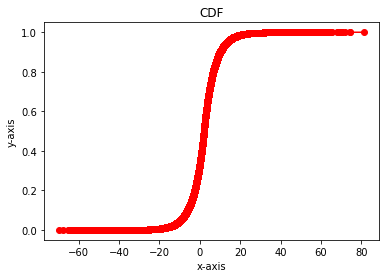

In [56]:
x = np.sort(lap_data)
N = 10000000
#Get the cdf values of y
y = np.arange(N) / float(N)
  
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');

To find a point that has a right probability of $p$ use the code below:

''
laplace.isf(p, loc = u, scale = b)
''

To find a point that has a left probability of $p$ use the code below:

''
laplace.isf(1-p, loc = u, scale = b)
''


In [57]:
p = 0.7
u, b = [5, 2]
print(f'The point in the Laplace(u={u}, b={b}) Distribution that has a right probabilty of *{p}*: ', laplace.isf(p, loc = u, scale = b))
print(f'The point in the Laplace(u={u}, b={b}) Distribution that has a left probabilty of *{p}*: ', laplace.isf(1-p, loc = u, scale = b))

The point in the Laplace(u=5, b=2) Distribution that has a right probabilty of *0.7*:  3.978348752468019
The point in the Laplace(u=5, b=2) Distribution that has a left probabilty of *0.7*:  6.021651247531981


To find the left probabilty of a point  use the code below:

''
laplace.cdf(X, loc = u, scale = b)
''

To find the right probabilty of a point  use the code below:

''
laplace.sf(X, loc = u, scale = b)
''

In [60]:
X = 1.5
u, b = [5, 2]
print(f'The left probabilty of *{X}* in the Laplace(u={u}, b={b}) Distribution is: ', laplace.cdf(X, loc = u, scale = b))
print(f'The Right probabilty of *{X}* in the Laplace(u={u}, b={b}) Distribution is: ', laplace.sf(X, loc = u, scale = b))

The left probabilty of *1.5* in the Laplace(u=5, b=2) Distribution is:  0.08688697172522257
The Right probabilty of *1.5* in the Laplace(u=5, b=2) Distribution is:  0.9131130282747775


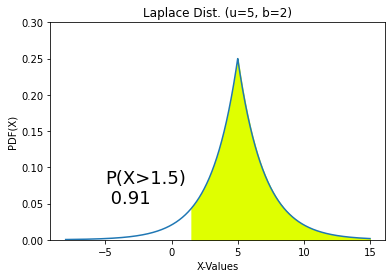

In [65]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(-8, 15, 0.001)
ax.plot(x, laplace.pdf(x, loc = u, scale = b))
ax.set_title(f'Laplace Dist. (u={u}, b={b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, 15, 0.001)
ax.set_ylim(0, 0.3)
ax.fill_between(px, laplace.pdf(px, loc = u, scale = b), color='#DFFF00')

prob = laplace.sf(X, loc = u, scale = b)
ax.text(-5, 0.05, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

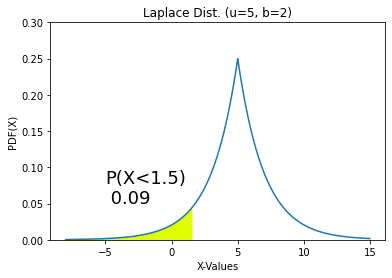

In [66]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(-8, 15, 0.001)
ax.plot(x, laplace.pdf(x, loc = u, scale = b))
ax.set_title(f'Laplace Dist. (u={u}, b={b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(-8, X, 0.001)
ax.set_ylim(0, 0.3)
ax.fill_between(px, laplace.pdf(px, loc = u, scale = b), color='#DFFF00')

prob = laplace.cdf(X, loc = u, scale = b)
ax.text(-5, 0.05, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probabilty between two points  use the code below:

''
laplace.cdf(Y, loc = u, scale = b) - laplace.cdf(X, loc = u, scale = b)
''

In [67]:
X = 0
Y = 5
u, b = [5, 2]
print(f'The probabilty between *({X}, {Y})* in the Laplace(u={u}, b={b}) Distribution is: ', laplace.cdf(Y, loc = u, scale = b) - laplace.cdf(X, loc = u, scale = b))

The probabilty between *(0, 5)* in the Laplace(u=5, b=2) Distribution is:  0.4589575006880506


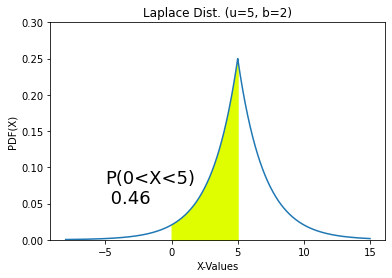

In [68]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(-8, 15, 0.001)
ax.plot(x, laplace.pdf(x, loc = u, scale = b))
ax.set_title(f'Laplace Dist. (u={u}, b={b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 0.3)
ax.fill_between(px, laplace.pdf(px, loc = u, scale = b), color='#DFFF00')

prob = laplace.cdf(Y, loc = u, scale = b) - laplace.cdf(X, loc = u, scale = b)
ax.text(-5, 0.05, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);